# Which stock indexes (tech, healthcare, energy, etc.) perform best under certain economic conditions (inflation, recession, recovery)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.dates as mdates

## Reading S&P 500 Indexes
- **Technology**
- **Heathcare**
- **Real Estate**
- **Energy**
- **Industrial**

# Ultimate Cleaning function

In [2]:
def clean_data(df, index_name = None):
    df = df.copy()
    # will show the index name if you specified it 
    if index_name:
        df['Index'] = index_name
        
    # will clean date and change it into datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    if 'Change %' in df.columns:
        df['Change %'] = (
            df['Change %']
            .astype(str)
            .str.replace('%', '', regex=False)
            .astype(float)
        )
    # cleans all , in this list
    numcol = ['Price', 'Open', 'High', 'Low']
    for col in numcol:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.replace(',','',regex=False)
            )
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # changes the abbrivated Million to actual million not sure if i want this yet        
    # if 'Vol.' in df.columns:
    #     df['Vol.'] = (
    #         df['Vol.']
    #         .astype(str)
    #         .str.replace('M', '', regex=False)
    #         .str.replace(',', '', regex=False)
    #     )
    #     df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce') * 1_000_000
        
        
    df = df.sort_values('Date').reset_index(drop = True)
    return df

# (useage)
# tech = clean_data(tech, "Technology")

## Reading all csv's

In [3]:
tech = pd.read_csv('Capstone csv\'s/S&P 500 Information Technology Historical Data.csv')
health = pd.read_csv('Capstone csv\'s/S&P 500 Health Care Historical Data (1).csv')
house = pd.read_csv('Capstone csv\'s/S&P 500 Real Estate Historical Data.csv')
energy = pd.read_csv('Capstone csv\'s/S&P 500 Energy Historical Data.csv')
indust = pd.read_csv('Capstone csv\'s/S&P 500 Industrials Historical Data.csv')
inflate = pd.read_csv('Capstone csv\'s/CPIAUCSL.csv')

In [4]:
inflate = inflate.rename(columns={'observation_date': 'Date', 'CPIAUCSL': 'Price'})

In [5]:
def clean_inflate(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    return df
# (useage)
# clean_inflate(inflate)

## Cleans inflaiton dataframe

In [6]:
inflate = clean_inflate(inflate)

## Cleans all Index csv's

In [7]:
csvlist = [tech,health,house,energy,indust]
namelist = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']
for i in range(len(csvlist)):
    csvlist[i] = clean_data(csvlist[i],namelist[i])
tech, health, house, energy, indust = csvlist

In [8]:
# merged_df = tech[['Date', 'Price']].rename(columns={'Price': 'Technology'})
# merged_df = merged_df.merge(health[['Date', 'Price']].rename(columns={'Price': 'Health'}), on='Date', how='outer')
# merged_df = merged_df.merge(house[['Date', 'Price']].rename(columns={'Price': 'Real Estate'}), on='Date', how='outer')
# merged_df = merged_df.merge(energy[['Date', 'Price']].rename(columns={'Price': 'Energy'}), on='Date', how='outer')
# merged_df = merged_df.merge(indust[['Date', 'Price']].rename(columns={'Price': 'Industrials'}), on='Date', how='outer')
# merged_df = merged_df.merge(inflate[['Date', 'Price']].rename(columns={'Price': 'Inflation'}), on='Date', how='outer')

# # Save to a single CSV
# merged_df.to_csv('Cleaned_CSVs/All_Sectors_SideBySide.csv', index=False)

In [9]:
# # First, make sure inflation dates are sorted
# inflate = inflate.sort_values('Date')

# # Forward fill monthly inflation so it applies to all following days
# inflate['Price'] = inflate['Price'].ffill()

In [10]:
# merged_df = tech[['Date', 'Price']].rename(columns={'Price': 'Technology'})
# merged_df = merged_df.merge(health[['Date', 'Price']].rename(columns={'Price': 'Health'}), on='Date', how='outer')
# merged_df = merged_df.merge(house[['Date', 'Price']].rename(columns={'Price': 'Real Estate'}), on='Date', how='outer')
# merged_df = merged_df.merge(energy[['Date', 'Price']].rename(columns={'Price': 'Energy'}), on='Date', how='outer')
# merged_df = merged_df.merge(indust[['Date', 'Price']].rename(columns={'Price': 'Industrials'}), on='Date', how='outer')
# merged_df = merged_df.merge(inflate[['Date', 'Price']].rename(columns={'Price': 'Inflation'}), on='Date', how='outer')

# # Save to a single CSV
# merged_df.to_csv('Cleaned_CSVs/All_Sectors_SideBySide.csv', index=False)

## averages prices for indexes
## used to setup comparision with inflation csv

In [11]:
def index_avg(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Price'].mean().reset_index()
    df_monthly['Date'] = df_monthly['Date'].dt.to_period('M').dt.to_timestamp()
    return df_monthly
# useage
#techavg = index_avg(tech)

# Graphing function for the year 2020-2025

In [12]:
def graphing(df,inx_name):
    
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # turn strings into real dates
    df = df.dropna(subset=['Date'])                           # drop rows with bad dates

    plt.plot(df['Date'], df['Price'])
    plt.title(f'{inx_name} Index - 2020 - 2025')
    plt.show()
# (use)
# graphing(tech,"Technology")

# Graphing Specific year function

In [13]:
def year_graph(df,inx_name,year):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # turn strings into real dates
    df = df.dropna(subset=['Date'])                           # drop rows with bad dates

    df = df[df['Date'].dt.year == year] 

    plt.plot(df['Date'], df['Price'])
    plt.title(f'{inx_name} Index {year}')
    plt.show()
# (use)
# year_graph(energy, "Energy", 2022)

## change the year function

In [14]:
def change_year(df,year):
    df = df[df['Date'].dt.year == year] 
    return df

## change month and year

In [15]:
def change_month_year(df,month,year):
    df = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == month)] 
    return df
# (useage)
# techmarch2020 = change_month_year(tech,3,2020)

# Comparision of two dataframes graph Function depending on Date and Price

In [16]:
def comp_graph(df1, lab1, df2, lab2):
    plt.plot(df1['Date'], df1['Price'], label= f'{lab1}')
    plt.plot(df2['Date'], df2['Price'], label = f'{lab2}')
    plt.title(f'{lab1} vs {lab2}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Month Comparision of 2 dataframes

In [17]:
def mcomp_graph(df1, lab1, df2, lab2):
    plt.plot(df1['Date'], df1['Price'], label= f'{lab1}')
    plt.plot(df2['Date'], df2['Price'], label = f'{lab2}')
    plt.title(f'{lab1} vs {lab2}')
    plt.xlabel('Date')
    plt.ylabel('Price')

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.legend()
    plt.show()

## Comparison of all dataframes

In [83]:
def multi_graph(dfs, labels):
    for i in range(len(dfs)):
        plt.plot(dfs[i]['Date'], dfs[i]['Price'], label=labels[i])
        
    plt.title(f'Price Comparision')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
#useage
# dfs = [tech,health,house,energy,indust]
# labels = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']
# multi_graph(dfs, labels)

In [79]:
def pretty_multi_graph(dfs, labels, title):

    fig, ax = plt.subplots(figsize=(12,8))
        
    for i in range(len(dfs)):
        ax.plot(dfs[i]['Date'], dfs[i]['Price'], label=labels[i])
        
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))     
    return fig, ax
    
#(useage)
# make sure you have 2 lists for this to work
#dfs2020 = [tech2020,health2020,house2020,energy2020,indust2020]
#labels2020 = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials'
# multi_graph(dfs2020, labels2020, "Price Comparision 2020")


# (in order to save)
    # (make sure fig, ax are present) 
# fig, ax = pretty_multi_graph(dfs2020, labels2020,"Price Comparison (2020)" )
# fig.savefig('Inflation_Graphs/Prices2020.png')
# plt.show()

### Shows Month Pretty graph

In [20]:
def mcomp_graph_stacked(df1, lab1, df2, lab2):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    ax1.plot(df1['Date'], df1['Price'], label=lab1, color='blue', linewidth=2)
    ax1.set_ylabel('Price', fontsize=11)
    ax1.set_title(lab1, fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(df2['Date'], df2['Price'], label=lab2, color='orange', linewidth=2)
    ax2.set_xlabel('Date', fontsize=11)
    ax2.set_ylabel('Price', fontsize=11)
    ax2.set_title(lab2, fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # forces to use monthly ticks using matplot dates
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax2.xaxis.set_major_locator(mdates.MonthLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    
    
    plt.tight_layout()
    plt.show()

# Usage
# mcomp_graph_stacked(tech2020, "Tech 2020", tech2025, "Tech 2025")

### Shows Year Pretty graph

In [21]:
def comp_graph_stacked(df1, lab1, df2, lab2):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    ax1.plot(df1['Date'], df1['Price'], label=lab1, color='blue', linewidth=2)
    ax1.set_ylabel('Price', fontsize=11)
    ax1.set_title(lab1, fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(df2['Date'], df2['Price'], label=lab2, color='orange', linewidth=2)
    ax2.set_xlabel('Date', fontsize=11)
    ax2.set_ylabel('Price', fontsize=11)
    ax2.set_title(lab2, fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3) 
    
    plt.tight_layout()
    plt.show()
# Usage
# comp_graph_stacked(tech2020, "Tech 2020", tech2025, "Tech 2025")

## Function to show two in one graph also shows a percentage

In [22]:
def comp_graph_dual(df1, lab1, df2, lab2, show_change=False):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    ax1.plot(df1['Date'], df1['Price'], color='blue', label=lab1)
    ax2.plot(df2['Date'], df2['Price'], color='red', label=lab2)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(lab1, color='blue')
    ax2.set_ylabel(lab2, color='red')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f'{lab1} vs {lab2}')
    plt.grid(True, alpha=0.3)
    plt.show()

    
    if show_change:
        fig, ax = plt.subplots(figsize=(10, 4))
        df1_change = df1.copy()
        df2_change = df2.copy()
        df1_change['% Change'] = df1_change['Price'].pct_change() * 100
        df2_change['% Change'] = df2_change['Price'].pct_change() * 100

        ax.plot(df1_change['Date'], df1_change['% Change'], label=f'{lab1} % Change', color='blue')
        ax.plot(df2_change['Date'], df2_change['% Change'], label=f'{lab2} % Change', color='red')
        ax.set_title('Monthly % Change Comparison')
        ax.set_xlabel('Date')
        ax.set_ylabel('% Change')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

#(useage)
    #shows two graphs if show_change = true 
        # if false it will only show the first one
# comp_graph_dual(tech, "Tech Index", inflate, "Inflation", show_change=True)

# Shows Month instead of year
## Usefull for comparing years like tech2020 and health2020
## or Inflation and tech

In [23]:
def mcomp_graph_dual(df1, lab1, df2, lab2, show_change=False):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    ax1.plot(df1['Date'], df1['Price'], color='blue', label=lab1)
    ax2.plot(df2['Date'], df2['Price'], color='red', label=lab2)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(lab1, color='blue')
    ax2.set_ylabel(lab2, color='red')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f'{lab1} vs {lab2}')

    # changes it to month
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')


    plt.grid(True, alpha=0.3)
    plt.show()

    
    if show_change:
        fig, ax = plt.subplots(figsize=(10, 4))
        df1_change = df1.copy()
        df2_change = df2.copy()
        df1_change['% Change'] = df1_change['Price'].pct_change() * 100
        df2_change['% Change'] = df2_change['Price'].pct_change() * 100

        ax.plot(df1_change['Date'], df1_change['% Change'], label=f'{lab1} % Change', color='blue')
        ax.plot(df2_change['Date'], df2_change['% Change'], label=f'{lab2} % Change', color='red')
        ax.set_title('Monthly % Change Comparison')
        ax.set_xlabel('Date')
        ax.set_ylabel('% Change')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # changes the look so its not crowded
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        

        plt.tight_layout()
        plt.show()

#(useage)
    #shows two graphs if show_change = true 
        # if false it will only show the first one
# mcomp_graph_dual(tech, "Tech Index", inflate, "Inflation", show_change=True)

## For saving only useage below

In [24]:
def save_mcomp_graph_dual(df1, lab1, df2, lab2, show_change=False):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    ax1.plot(df1['Date'], df1['Price'], color='blue', label=lab1)
    ax2.plot(df2['Date'], df2['Price'], color='red', label=lab2)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(lab1, color='blue')
    ax2.set_ylabel(lab2, color='red')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f'{lab1} vs {lab2}')

    # format x-axis
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    if show_change:
        fig2, ax = plt.subplots(figsize=(10, 4))
        df1_change = df1.copy()
        df2_change = df2.copy()
        df1_change['% Change'] = df1_change['Price'].pct_change() * 100
        df2_change['% Change'] = df2_change['Price'].pct_change() * 100

        ax.plot(df1_change['Date'], df1_change['% Change'], label=f'{lab1} % Change', color='blue')
        ax.plot(df2_change['Date'], df2_change['% Change'], label=f'{lab2} % Change', color='red')
        ax.set_title('Monthly % Change Comparison')
        ax.set_xlabel('Date')
        ax.set_ylabel('% Change')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        plt.tight_layout()

        return fig, fig2  # return both figures

    return fig  # only the first one if show_change=False

#(useage)
## if change = false
# fig = save_mcomp_graph_dual(inflate, "Inflation avg", techavg, "Tech avg", show_change=False)
# fig.savefig('Inflation_Graphs/tech_vs_inflation.png')
# plt.show()

## if change = true
# fig1, fig2 = save_mcomp_graph_dual(inflate, "Inflation avg", techavg, "Tech avg", show_change=True)
# fig1.savefig('Inflation_Graphs/tech_vs_inflation_main.png')
# fig2.savefig('Inflation_Graphs/tech_vs_inflation_change.png')
# plt.show()

In [25]:
# def comp_price(df1, lab1, df2, lab2):
#     plt.plot(df1['Price'], label= f'{lab1}')
#     plt.plot(df2['Price'], label = f'{lab2}')
#     plt.title(f'{lab1} vs {lab2}')
#     plt.ylabel('Price')
#     plt.legend()
#     plt.show()

In [26]:
# graph_list = [tech,health,house,energy,indust]
# namelist = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']
# for i in range(len(graph_list)):
#     graph_list[i] = graphing(graph_list[i],namelist[i])
# tech, health, house, energy, indust = graph_list

# graphing(tech, "Technology")
# graphing(health, "Health")
# graphing(house, "Housing")
# graphing(indust, "Industrial")
# graphing(energy, "Energy")

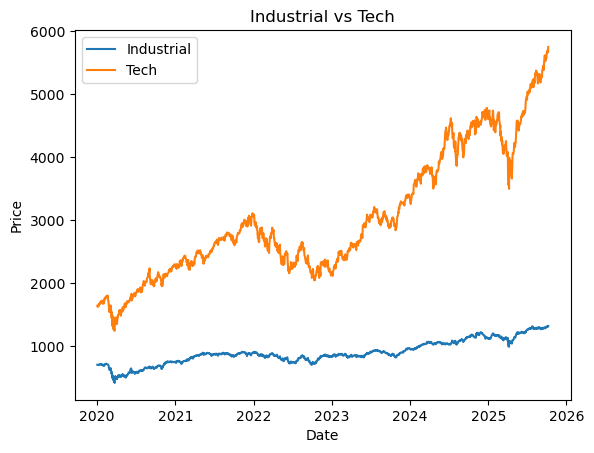

In [27]:
comp_graph(indust, "Industrial", tech, "Tech")

In [28]:
tech2020 = change_year(tech, 2020)
tech2021 = change_year(tech, 2021)
tech2022 = change_year(tech, 2022)
tech2023 = change_year(tech, 2023)
tech2024 = change_year(tech, 2024)
tech2025 = change_year(tech, 2025)
# year_graph(energy, "Energy", 2022)

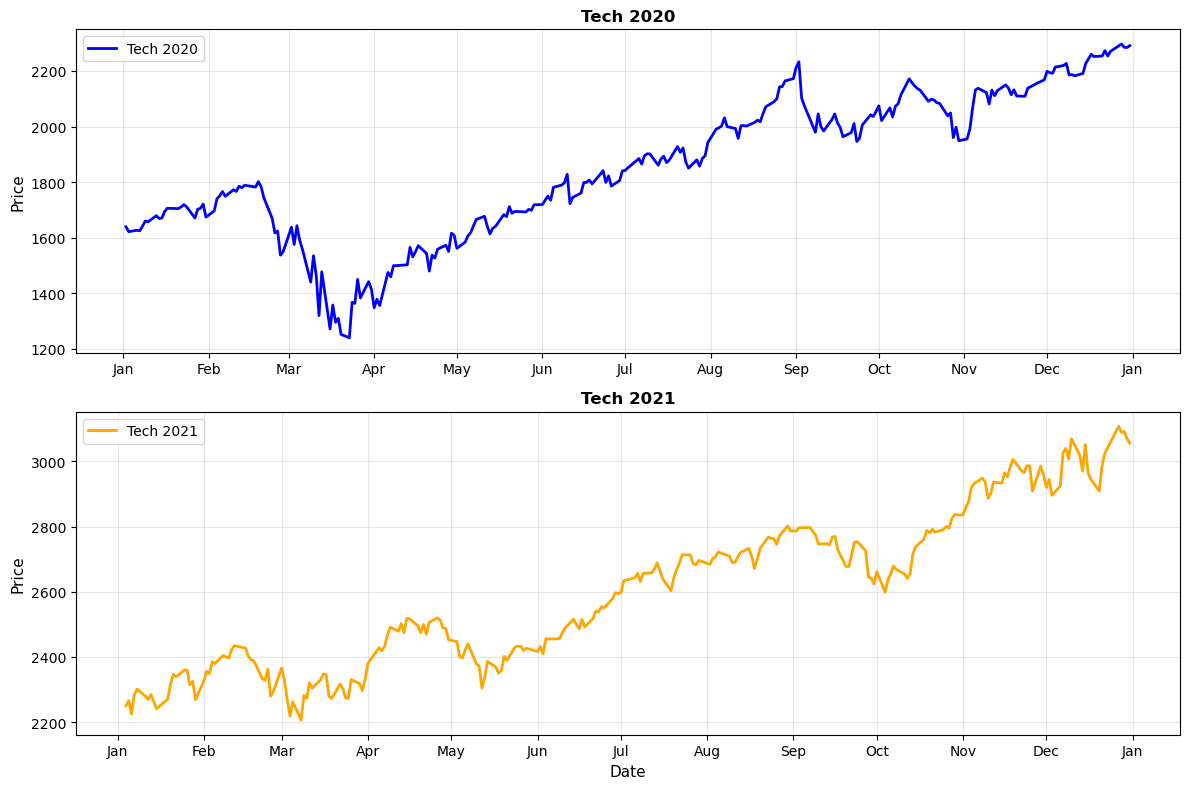

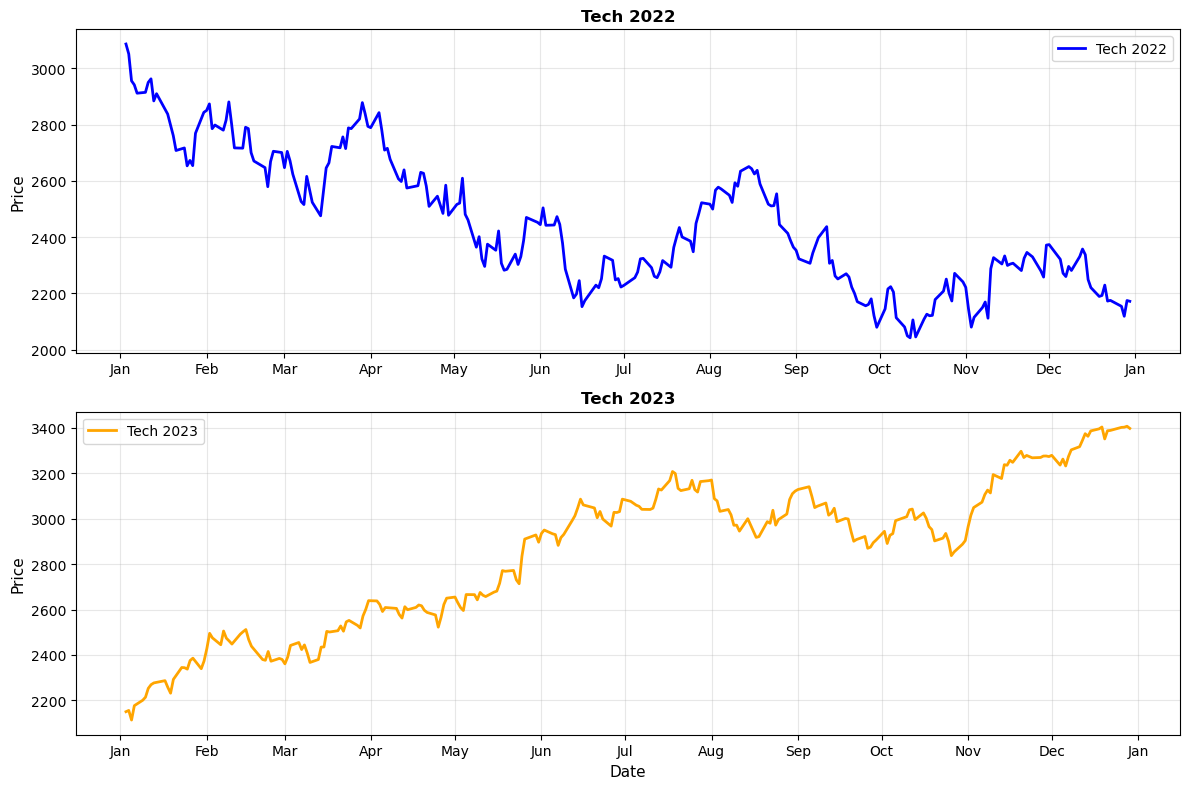

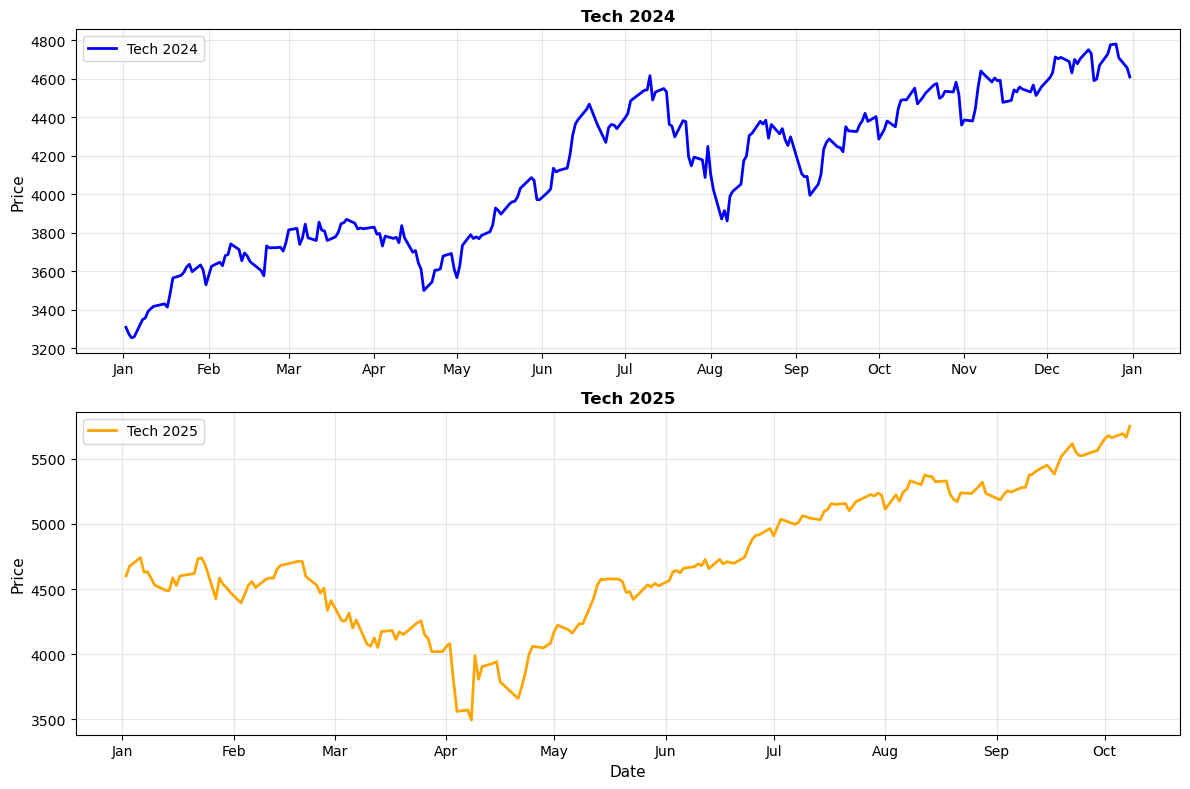

In [29]:
mcomp_graph_stacked(tech2020, "Tech 2020", tech2021, "Tech 2021")
mcomp_graph_stacked(tech2022, "Tech 2022", tech2023, "Tech 2023")
mcomp_graph_stacked(tech2024, "Tech 2024", tech2025, "Tech 2025")

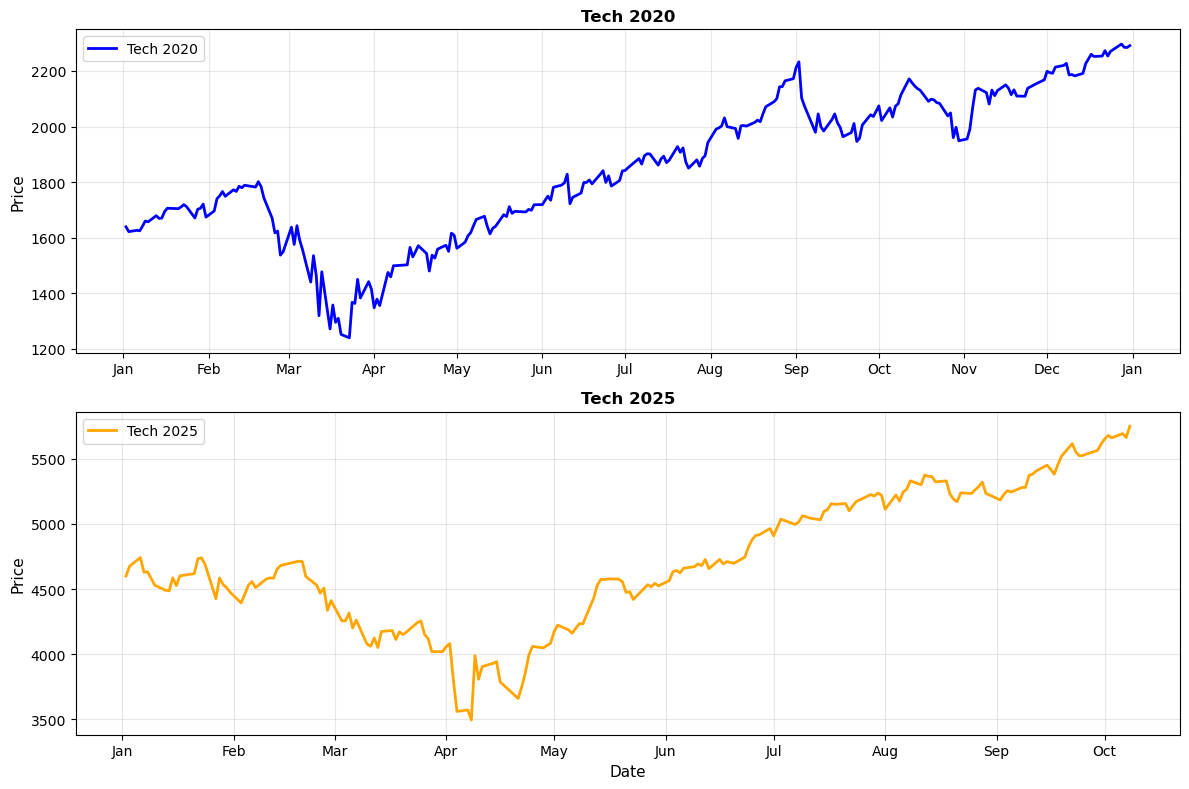

In [30]:
mcomp_graph_stacked(tech2020, "Tech 2020", tech2025, "Tech 2025")

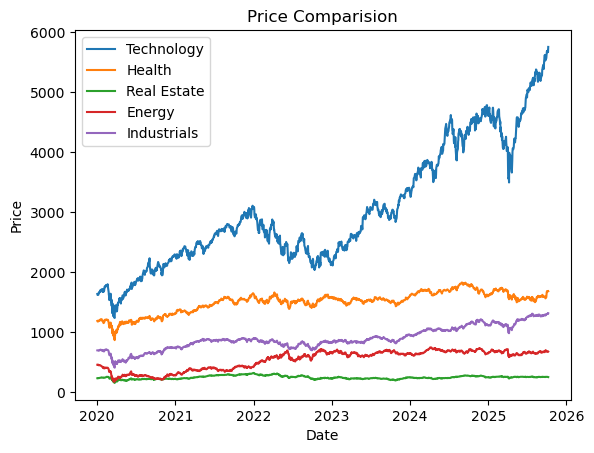

In [82]:
dfs = [tech,health,house,energy,indust]
labels = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']
multi_graph(dfs, labels)

In [32]:
## Real Estate and Energy are the lowest

In [33]:
## Health and Tech is the highest

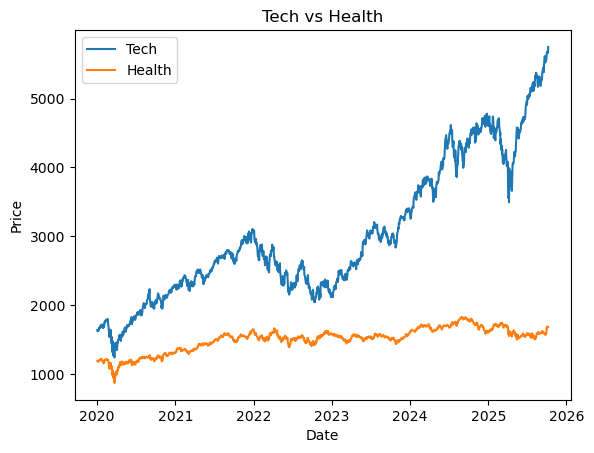

In [34]:
comp_graph(tech, "Tech", health, "Health")

In [35]:
house2020 = change_year(house, 2020)
# comp_graph_stacked(tech2022, "Tech 2022", house2022, "Housing 2022")

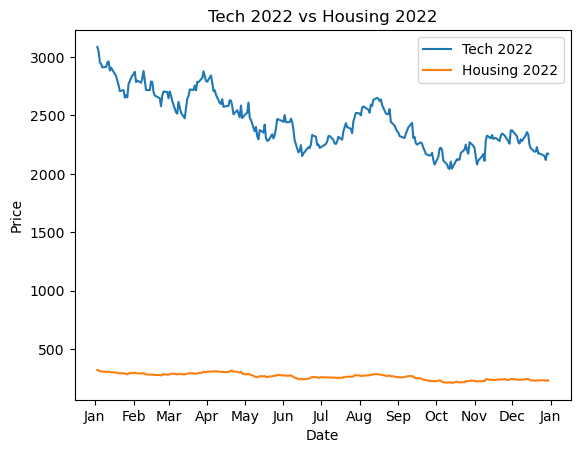

In [36]:
house2022 = change_year(house, 2022)
mcomp_graph(tech2022,'Tech 2022',house2022,'Housing 2022')

In [37]:
health2020 = change_year(health, 2020)
health2021 = change_year(health, 2021)
health2022 = change_year(health, 2022)
health2023 = change_year(health, 2023)
health2024 = change_year(health, 2024)
health2025 = change_year(health, 2025)

In [38]:
house2020 = change_year(house, 2020)
house2021 = change_year(house, 2021)
house2022 = change_year(house, 2022)
house2023 = change_year(house, 2023)
house2024 = change_year(house, 2024)
house2025 = change_year(house, 2025)

In [39]:
indust2020 = change_year(indust, 2020)
indust2021 = change_year(indust, 2021)
indust2022 = change_year(indust, 2022)
indust2023 = change_year(indust, 2023)
indust2024 = change_year(indust, 2024)
indust2025 = change_year(indust, 2025)

In [40]:
energy2020 = change_year(energy, 2020)
energy2021 = change_year(energy, 2021)
energy2022 = change_year(energy, 2022)
energy2023 = change_year(energy, 2023)
energy2024 = change_year(energy, 2024)
energy2025 = change_year(energy, 2025)

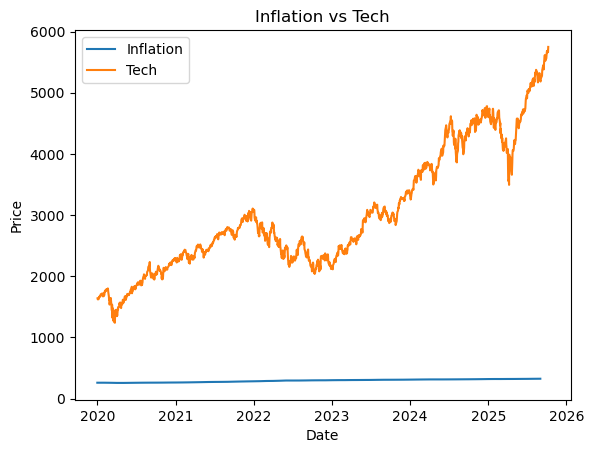

In [41]:
comp_graph(inflate, "Inflation", tech, "Tech")

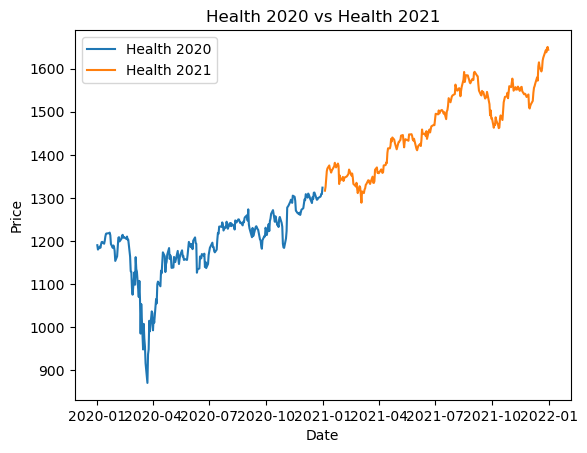

In [42]:
comp_graph(health2020, "Health 2020", health2021, "Health 2021")

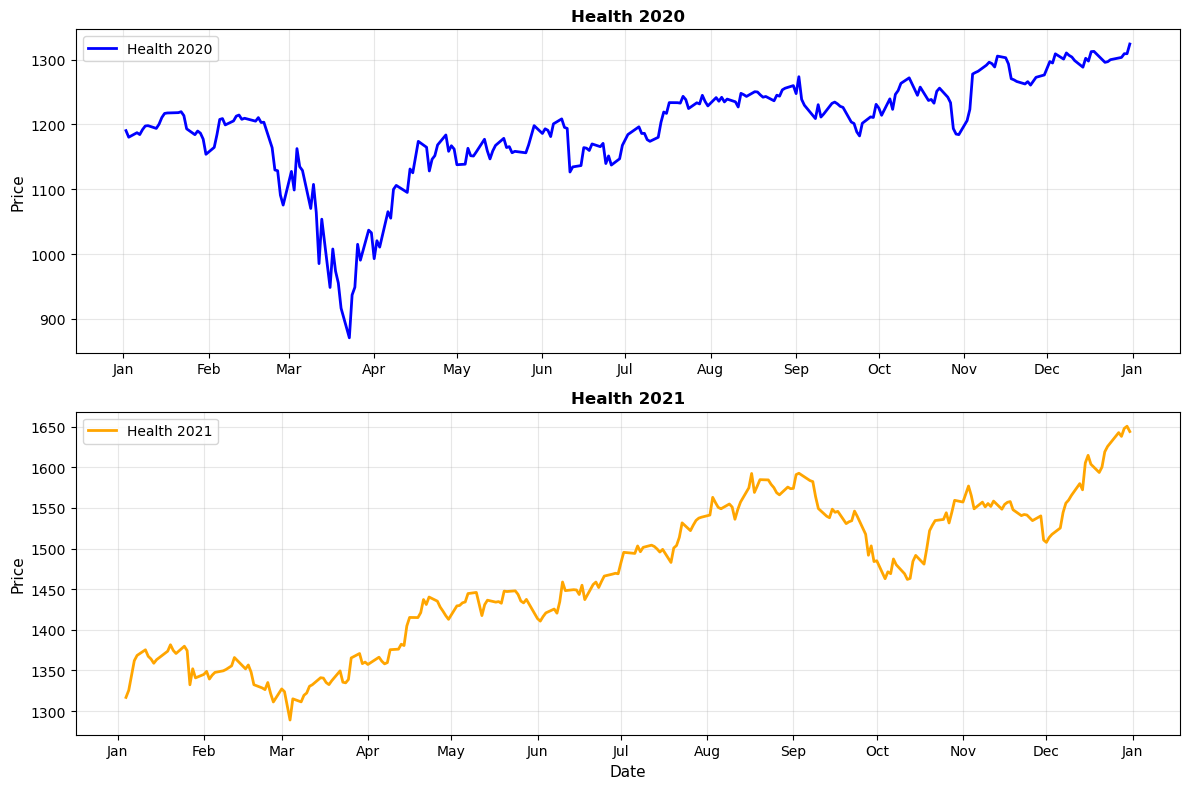

In [43]:
mcomp_graph_stacked(health2020, "Health 2020", health2021, "Health 2021")

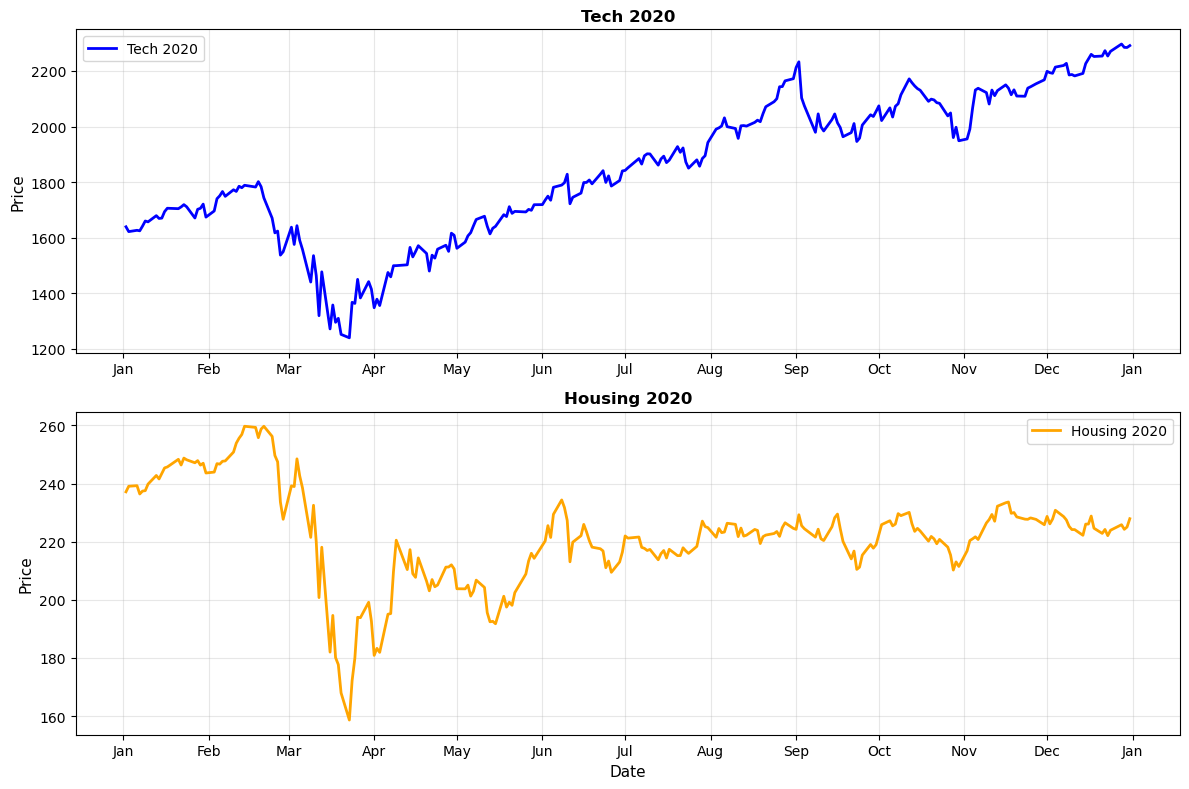

In [44]:
mcomp_graph_stacked(tech2020, "Tech 2020", house2020, "Housing 2020")

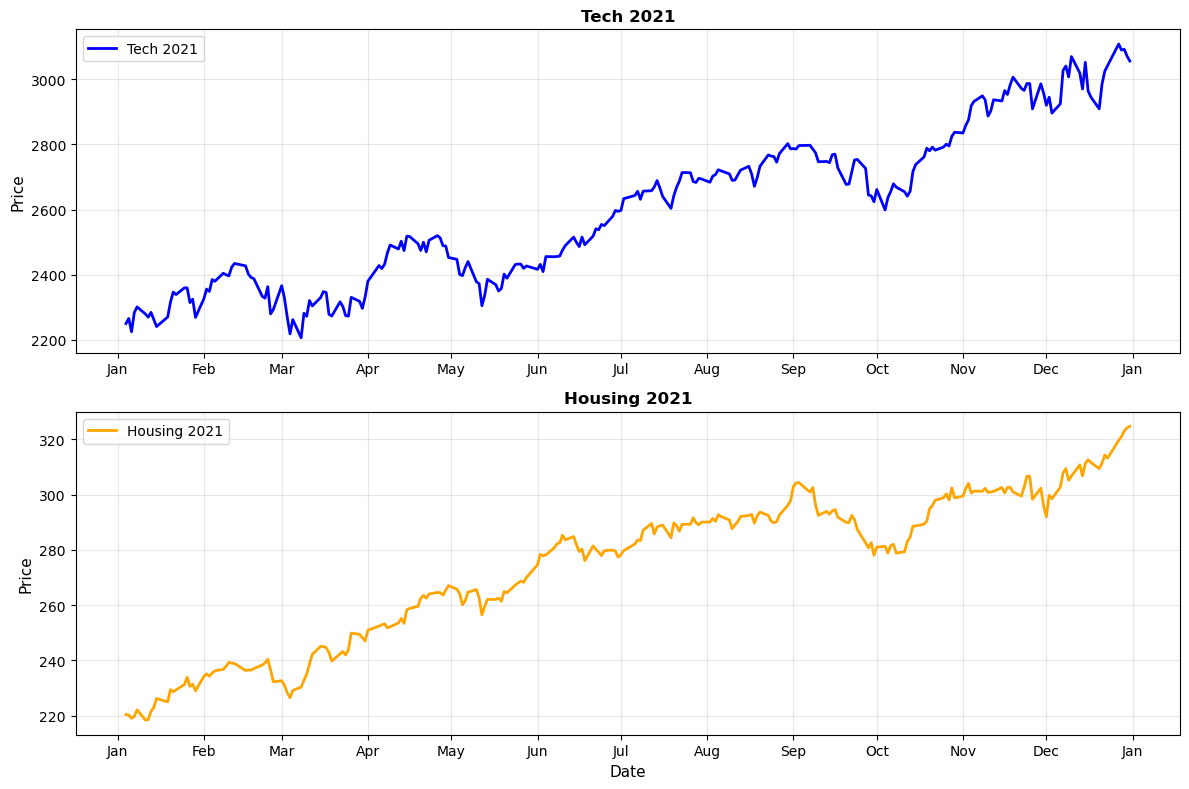

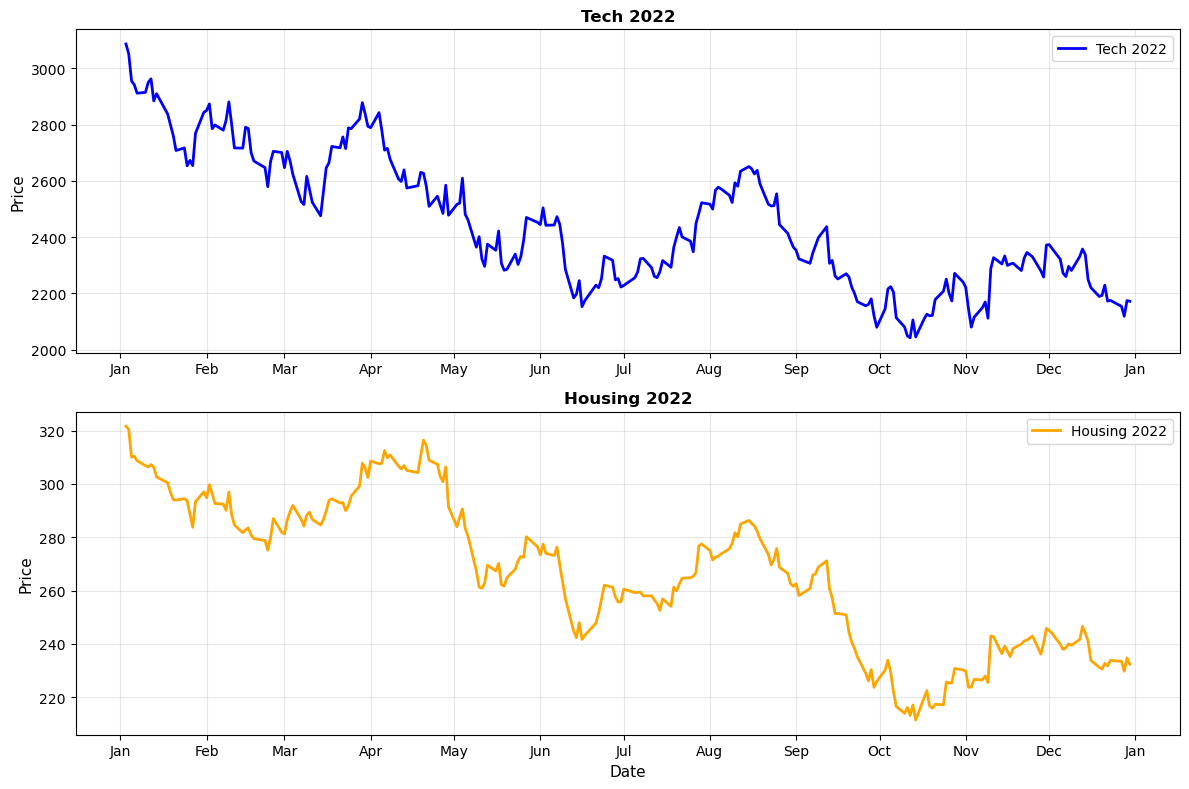

In [45]:
mcomp_graph_stacked(tech2021, "Tech 2021", house2021, "Housing 2021")
mcomp_graph_stacked(tech2022, "Tech 2022", house2022, "Housing 2022")

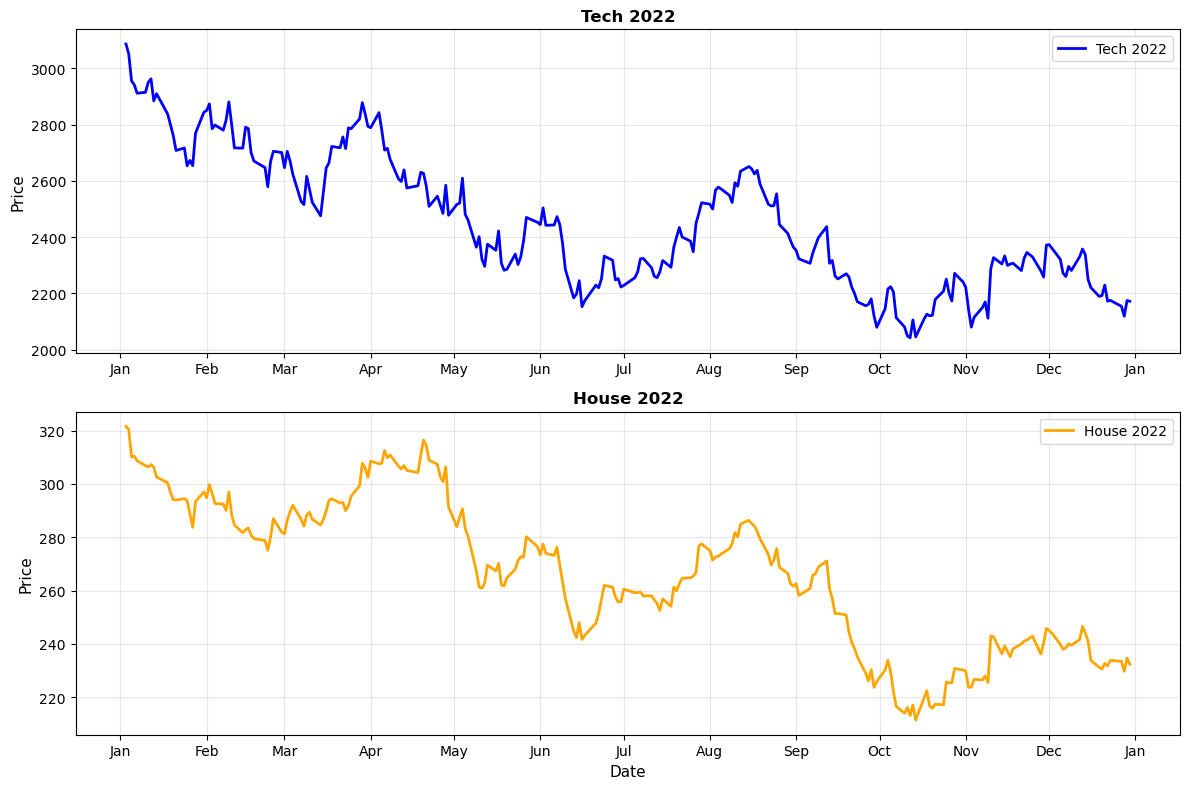

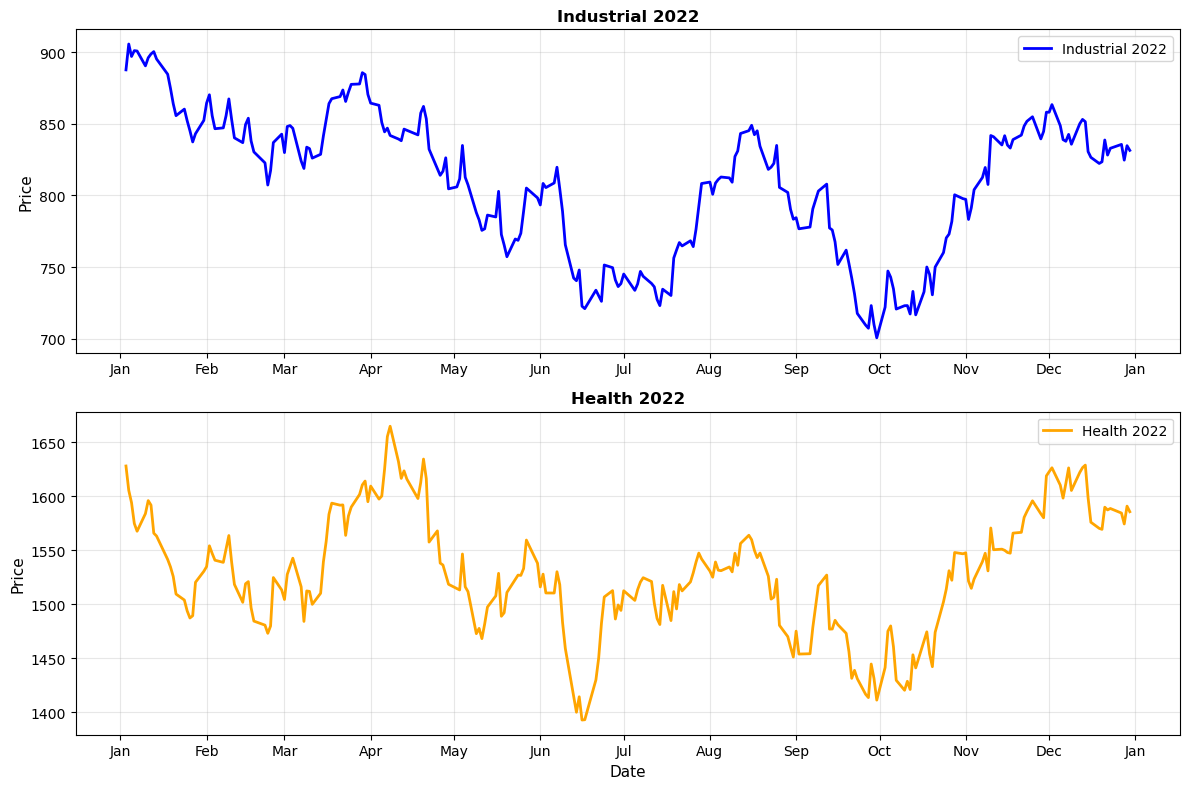

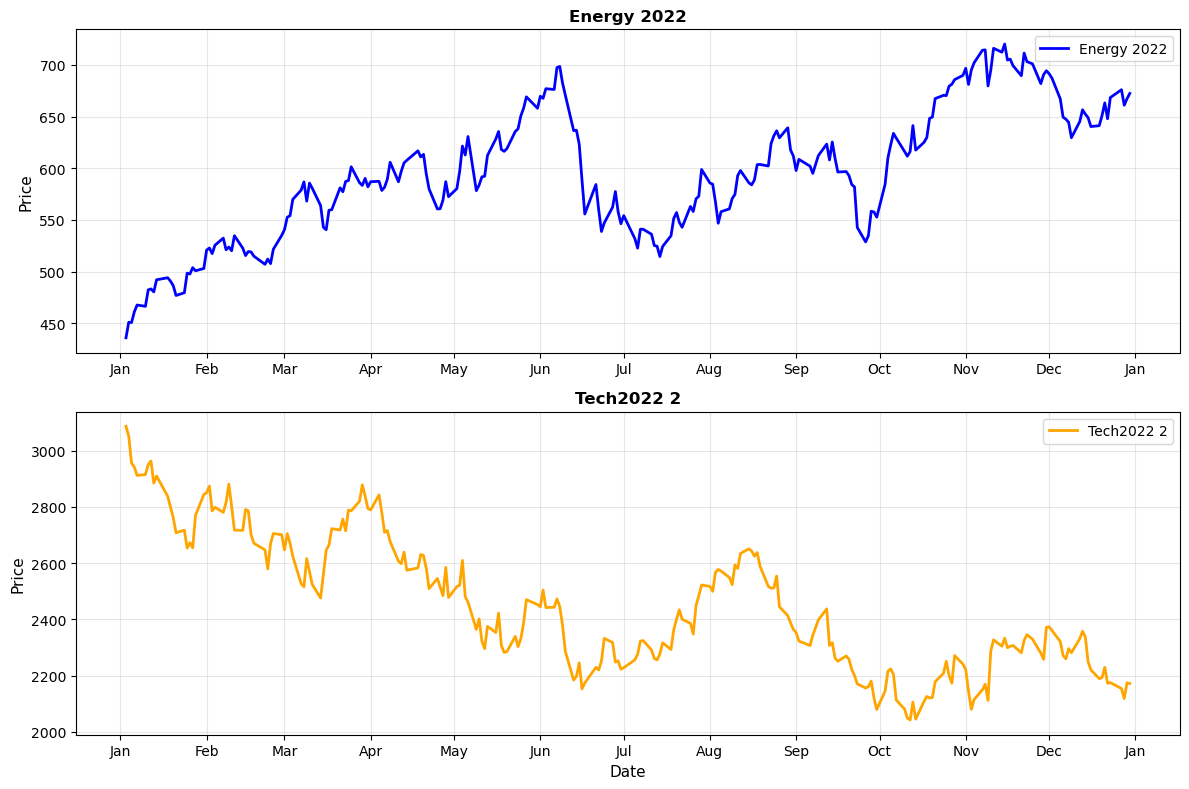

In [46]:
mcomp_graph_stacked(tech2022, "Tech 2022", house2022, "House 2022")
mcomp_graph_stacked(indust2022, "Industrial 2022", health2022, "Health 2022")
mcomp_graph_stacked(energy2022, "Energy 2022", tech2022, "Tech2022 2")

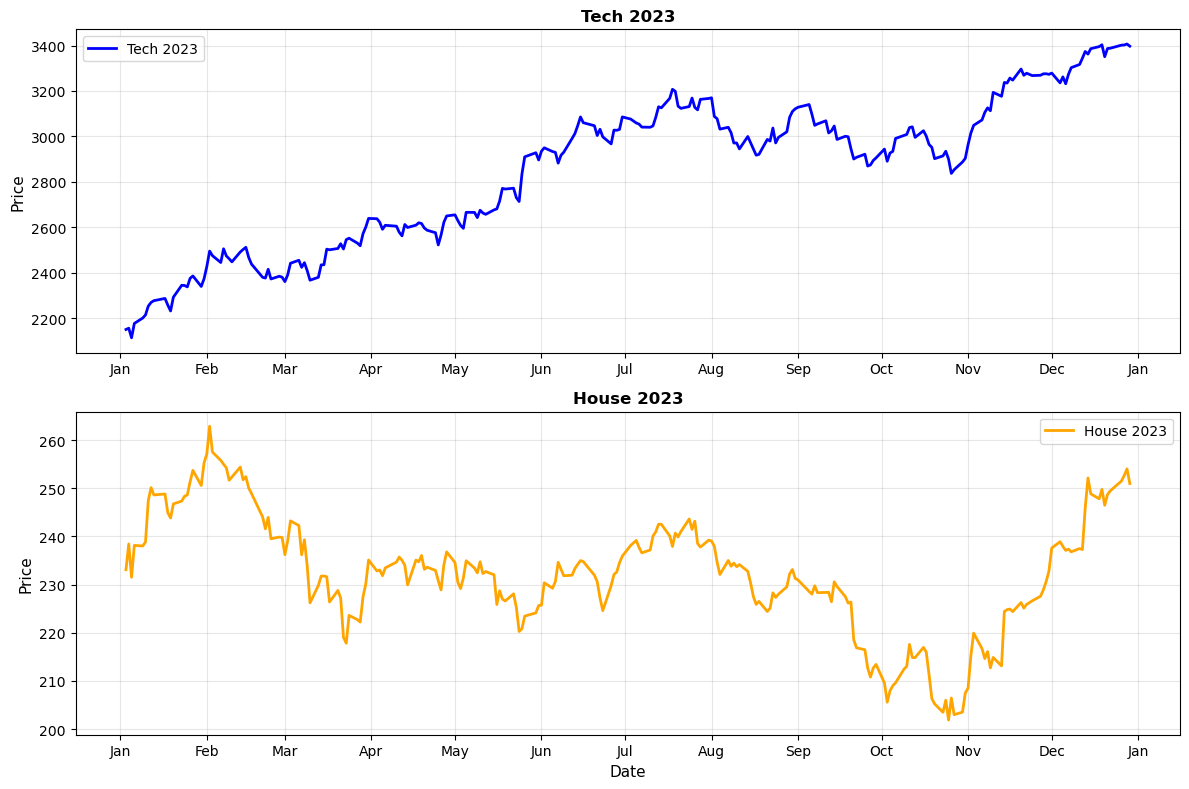

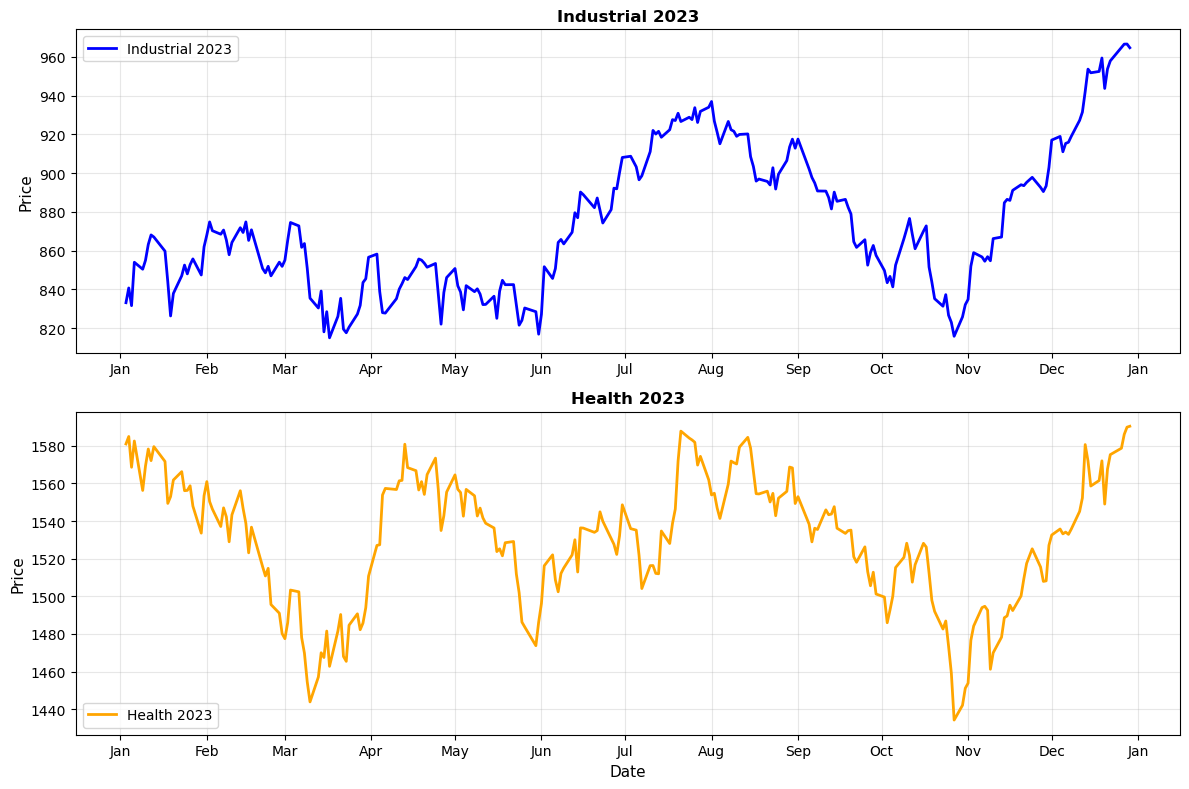

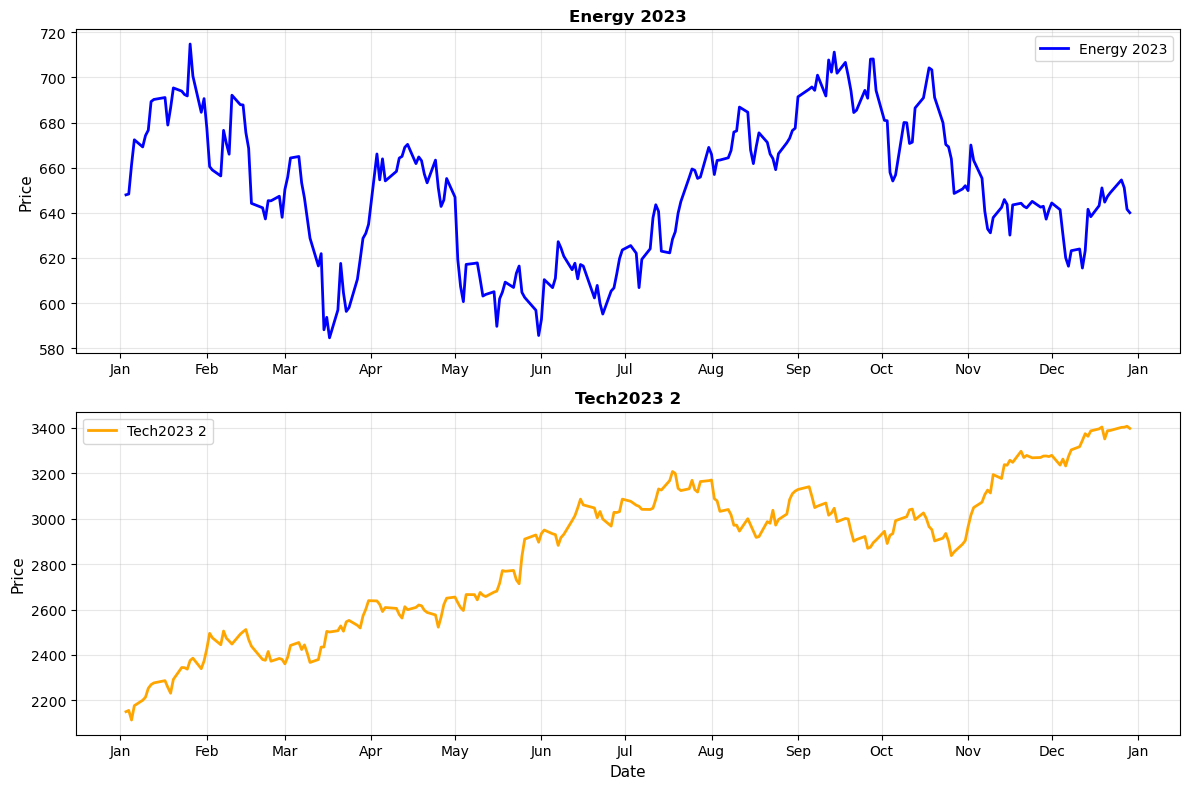

In [47]:
mcomp_graph_stacked(tech2023, "Tech 2023", house2023, "House 2023")
mcomp_graph_stacked(indust2023, "Industrial 2023", health2023, "Health 2023")
mcomp_graph_stacked(energy2023, "Energy 2023", tech2023, "Tech2023 2")

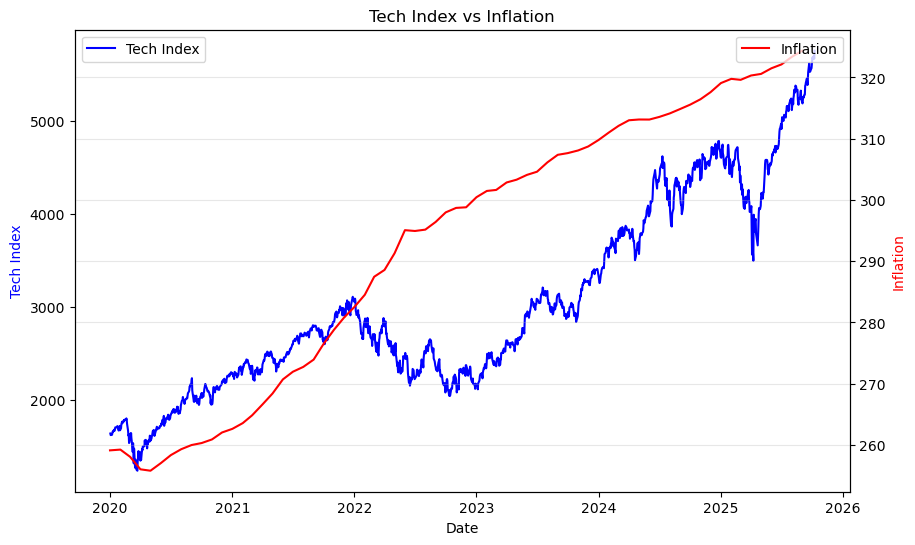

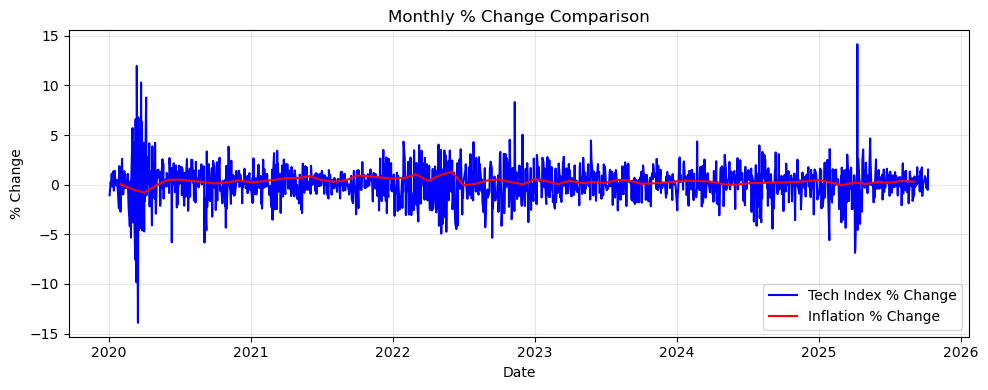

In [48]:
comp_graph_dual(tech, "Tech Index", inflate, "Inflation", show_change=True)

In [49]:
technov2020 = change_year(tech,2020)
inflatenov2021 = change_month_year(inflate,11,2021)

In [50]:
techavg = index_avg(tech)
healthavg = index_avg(health)
industavg = index_avg(indust)
energyavg = index_avg(energy)
houseavg = index_avg(house)

C:\Users\Hubie\AppData\Local\Temp\ipykernel_9348\3216662635.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Price'].mean().reset_index()
C:\Users\Hubie\AppData\Local\Temp\ipykernel_9348\3216662635.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Price'].mean().reset_index()
C:\Users\Hubie\AppData\Local\Temp\ipykernel_9348\3216662635.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Price'].mean().reset_index()
C:\Users\Hubie\AppData\Local\Temp\ipykernel_9348\3216662635.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Price'].m

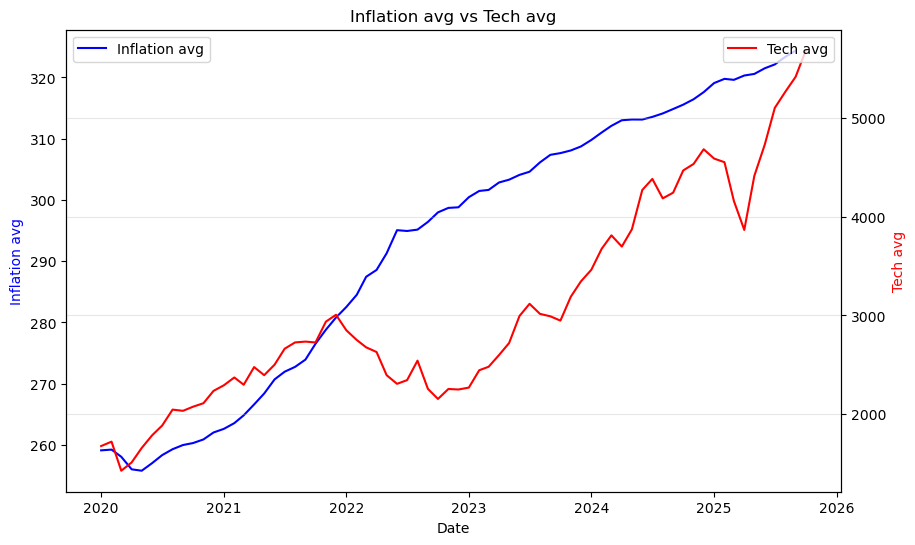

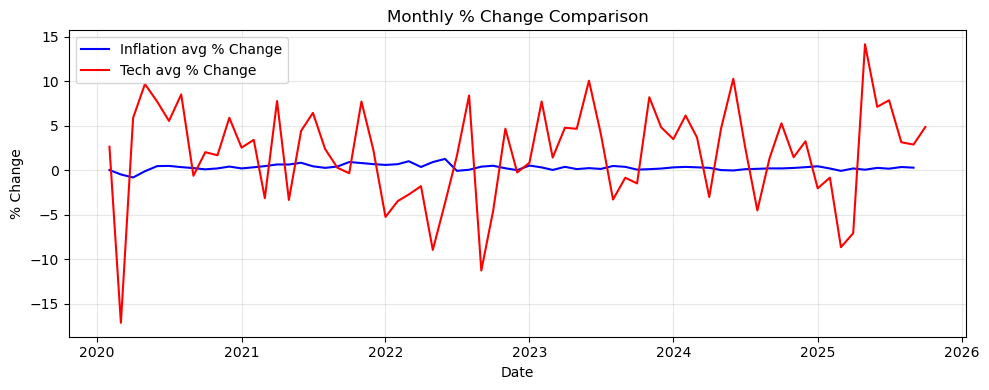

In [51]:
comp_graph_dual(inflate, "Inflation avg", techavg, "Tech avg", show_change=True)

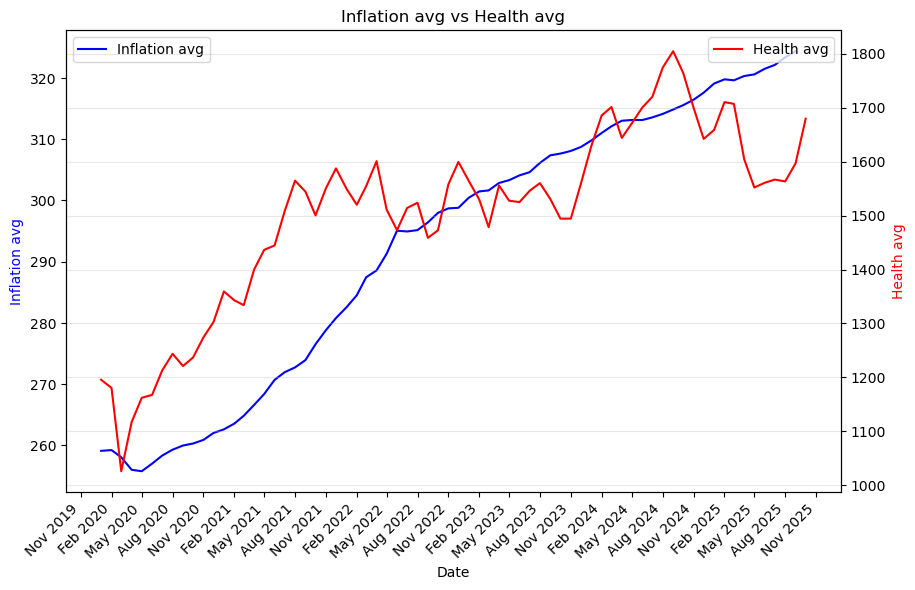

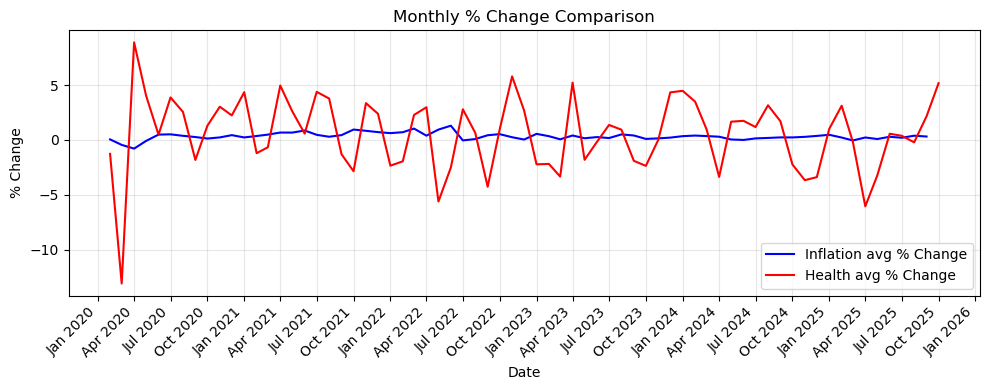

In [52]:
mcomp_graph_dual(inflate, "Inflation avg", healthavg, "Health avg", show_change=True)

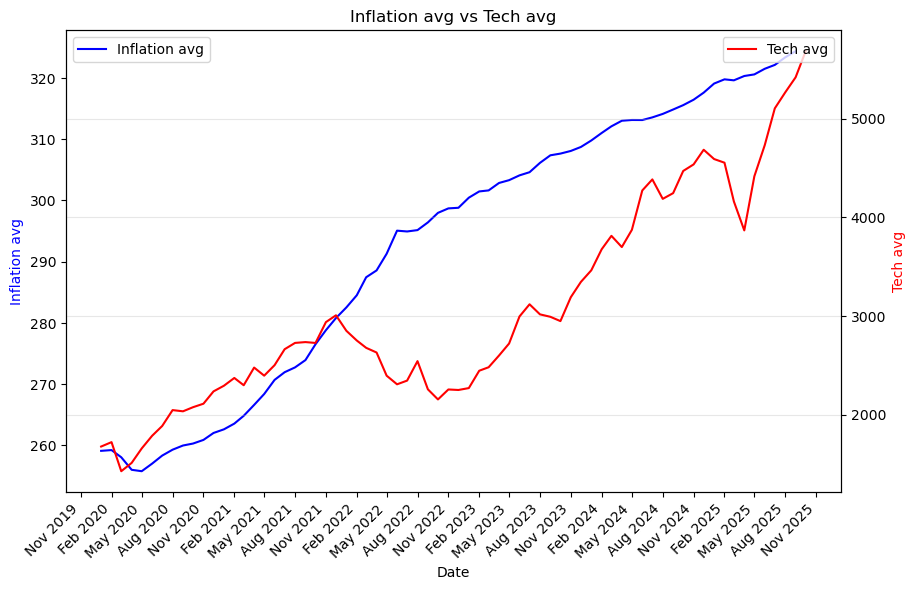

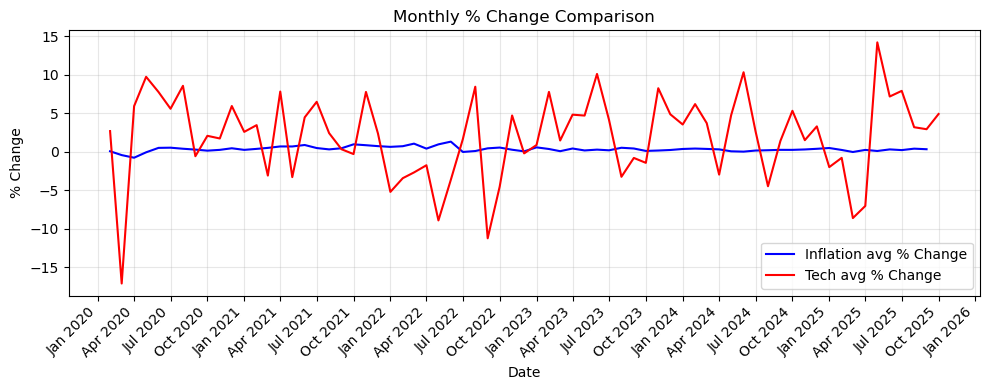

In [53]:
mcomp_graph_dual(inflate, "Inflation avg", techavg, "Tech avg", show_change=True)

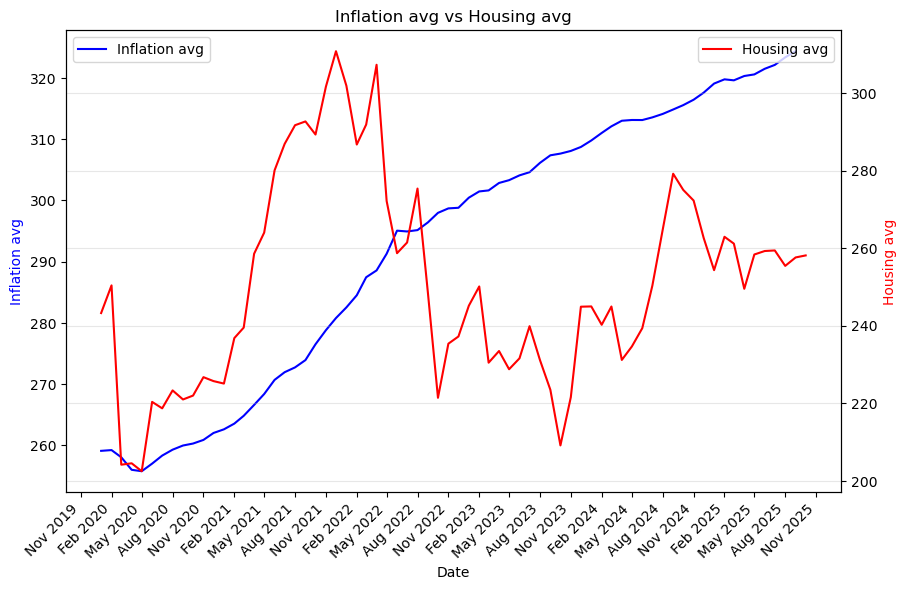

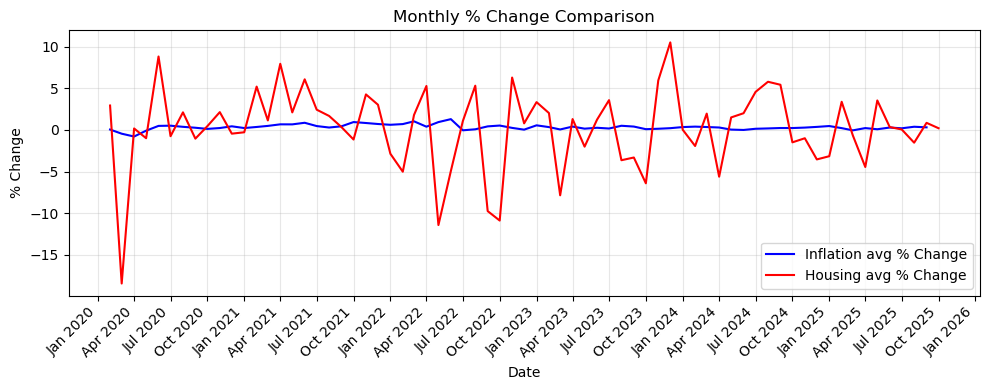

In [54]:
mcomp_graph_dual(inflate, "Inflation avg", houseavg, "Housing avg", show_change=True)

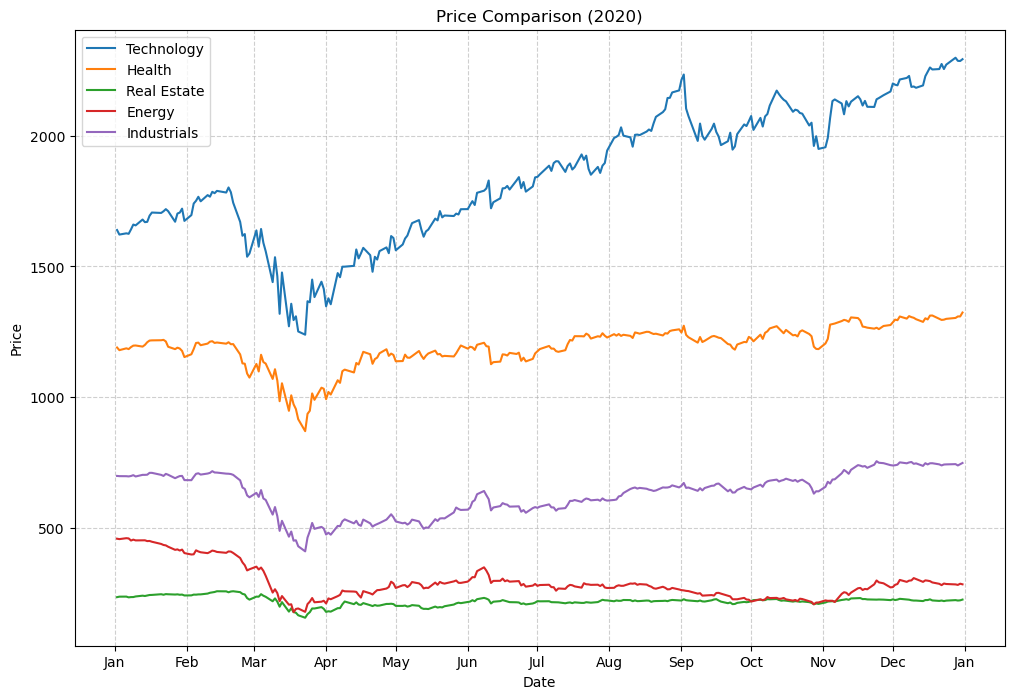

In [55]:

dfs2020 = [tech2020,health2020,house2020,energy2020,indust2020]
labels2020 = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']

# pretty_multi_graph(dfs2020, labels2020,"Price Comparison (2020)")
fig, ax = pretty_multi_graph(dfs2020, labels2020,"Price Comparison (2020)" )
fig.savefig('Inflation_Graphs/Prices2020.png')
plt.show()

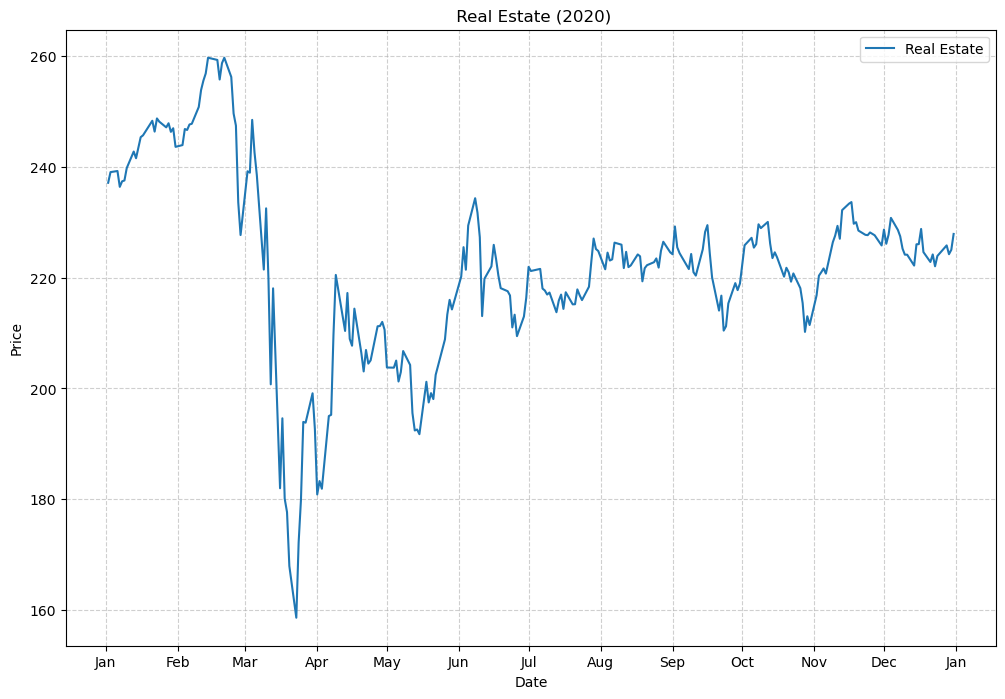

In [56]:

h2020 = [house2020]
lab2020 = ['Real Estate']

# pretty_multi_graph(dfs2020, labels2020,"Price Comparison (2020)")
fig, ax = pretty_multi_graph(h2020, lab2020," Real Estate (2020)" )
fig.savefig('Inflation_Graphs/HousingPrices2020.png')
plt.show()

In [57]:
healthavg2020 = change_year(healthavg,2020)
healthavg2021 = change_year(healthavg,2021)
healthavg2022 = change_year(healthavg,2022)
healthavg2023 = change_year(healthavg,2023)
healthavg2024 = change_year(healthavg,2024)
healthavg2025 = change_year(healthavg,2025)

In [58]:
inflate2020 = change_year(inflate, 2020)
inflate2021 = change_year(inflate, 2021)
inflate2022 = change_year(inflate, 2022)
inflate2023 = change_year(inflate, 2023)
inflate2024 = change_year(inflate, 2024)
inflate2025 = change_year(inflate, 2025)

In [59]:
energyavg2020 = change_year(energyavg,2020)
energyavg2021 = change_year(energyavg,2021)
energyavg2022 = change_year(energyavg,2022)
energyavg2023 = change_year(energyavg,2023)
energyavg2024 = change_year(energyavg,2024)
energyavg2025 = change_year(energyavg,2025)

In [64]:
techavg2020 = change_year(techavg,2020)
techavg2021 = change_year(techavg,2021)
techavg2022 = change_year(techavg,2022)
techavg2023 = change_year(techavg,2023)
techavg2024 = change_year(techavg,2024)
techavg2025 = change_year(techavg,2025)

In [65]:
houseavg2020 = change_year(houseavg,2020)
houseavg2021 = change_year(houseavg,2021)
houseavg2022 = change_year(houseavg,2022)
houseavg2023 = change_year(houseavg,2023)
houseavg2024 = change_year(houseavg,2024)
houseavg2025 = change_year(houseavg,2025)

In [66]:
industavg2020 = change_year(industavg,2020)
industavg2021 = change_year(industavg,2021)
industavg2022 = change_year(industavg,2022)
industavg2023 = change_year(industavg,2023)
industavg2024 = change_year(industavg,2024)
industavg2025 = change_year(industavg,2025)

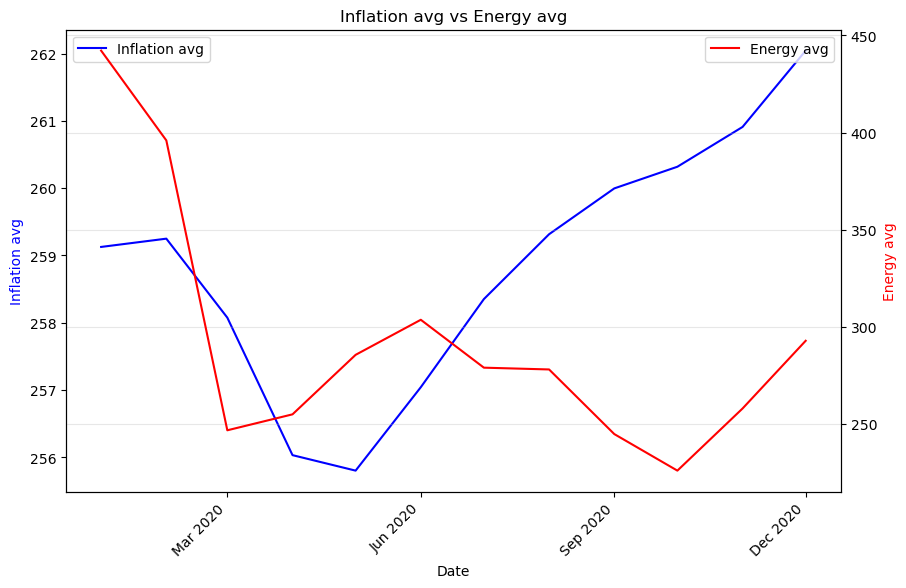

In [60]:
mcomp_graph_dual(inflate2020, "Inflation avg", energyavg2020, "Energy avg", show_change=False)

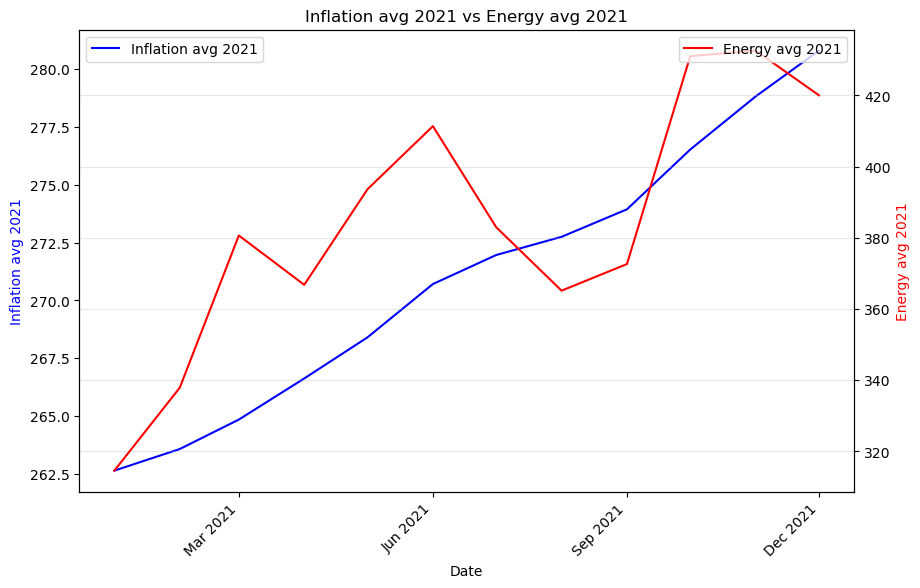

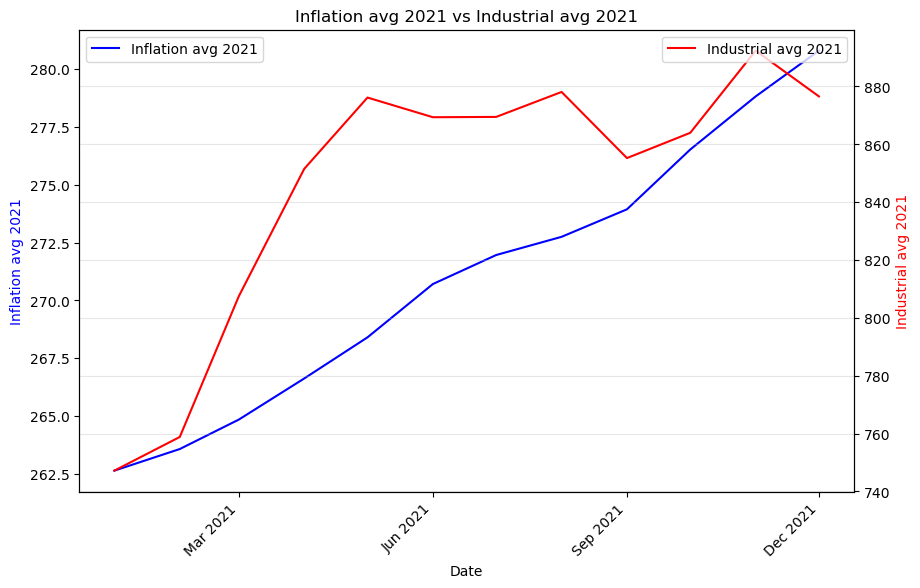

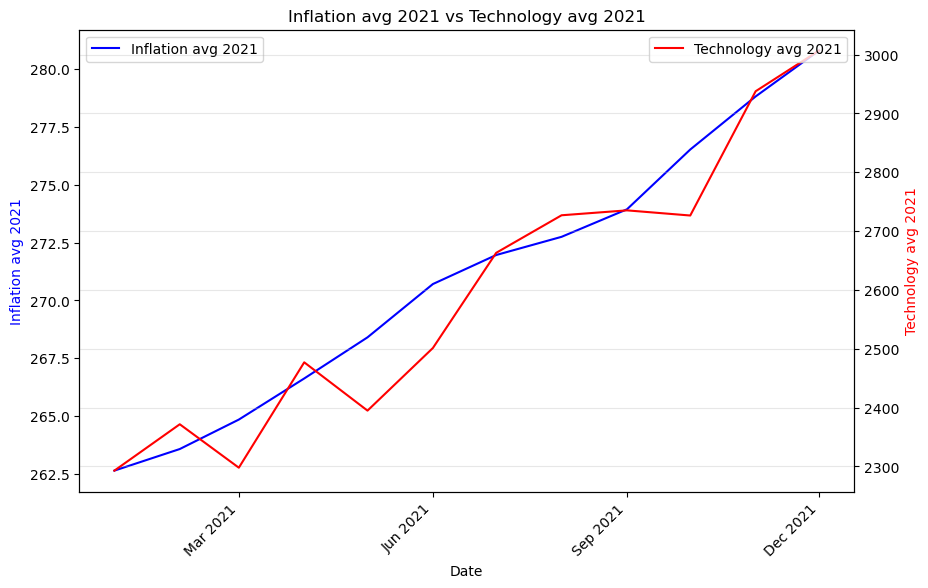

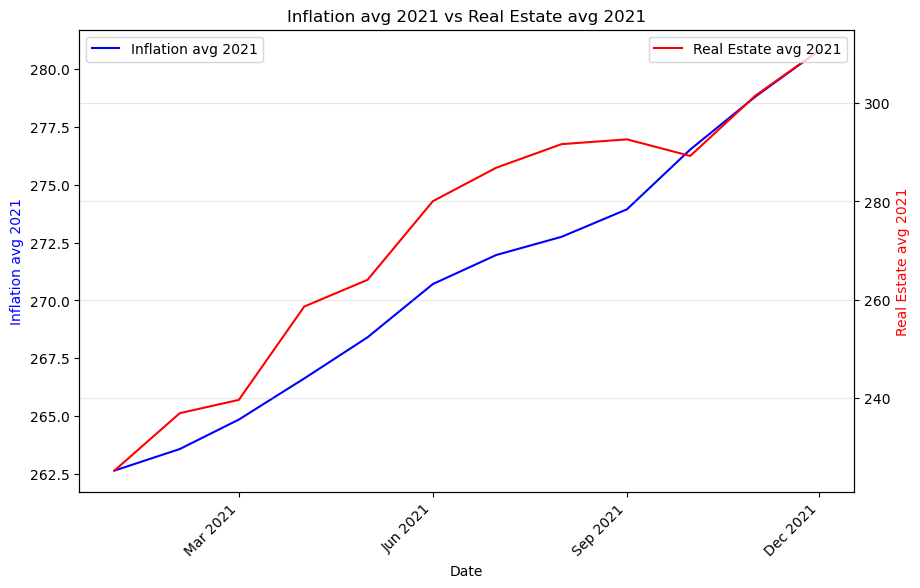

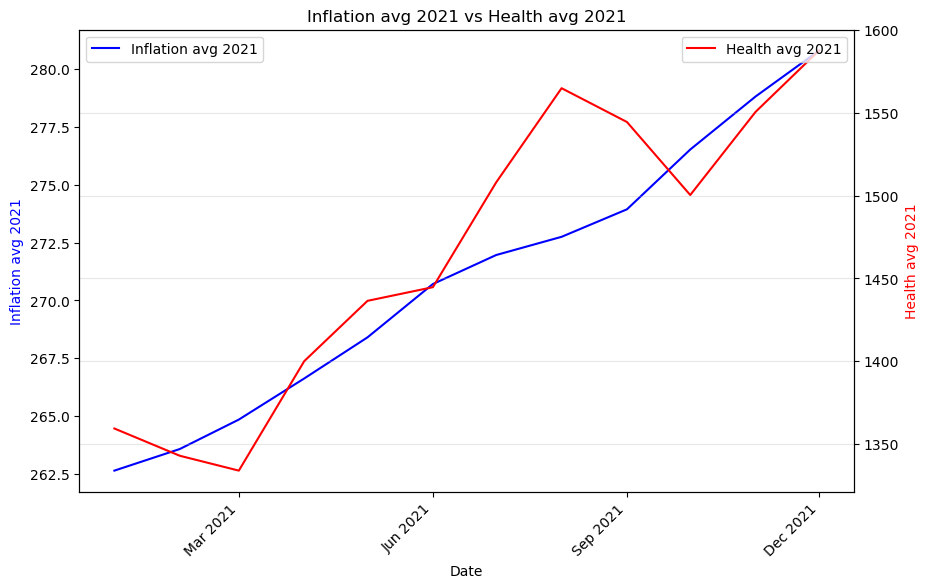

In [68]:
mcomp_graph_dual(inflate2021, "Inflation avg 2021", energyavg2021, "Energy avg 2021", show_change=False)
mcomp_graph_dual(inflate2021, "Inflation avg 2021", industavg2021, "Industrial avg 2021", show_change=False)
mcomp_graph_dual(inflate2021, "Inflation avg 2021", techavg2021, "Technology avg 2021", show_change=False)
mcomp_graph_dual(inflate2021, "Inflation avg 2021", houseavg2021, "Real Estate avg 2021", show_change=False)
mcomp_graph_dual(inflate2021, "Inflation avg 2021", healthavg2021, "Health avg 2021", show_change=False)

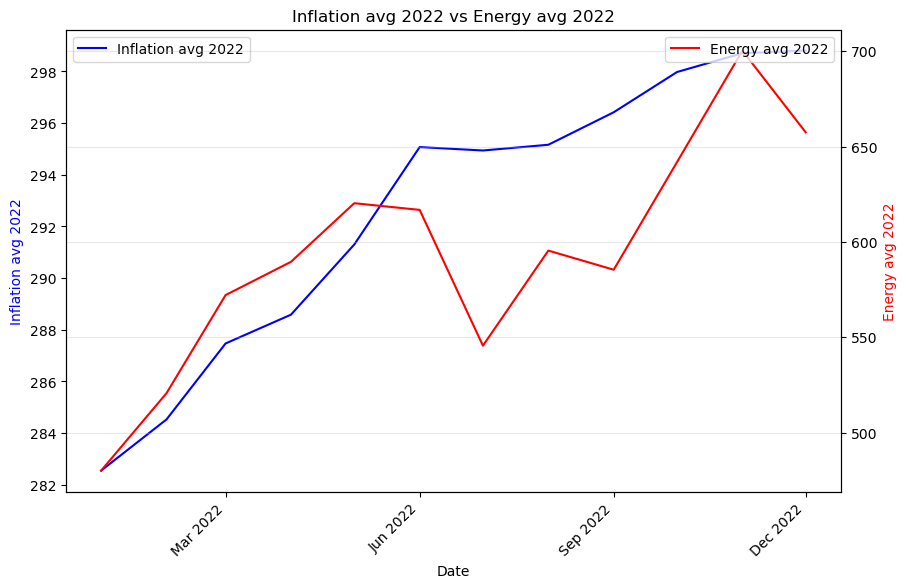

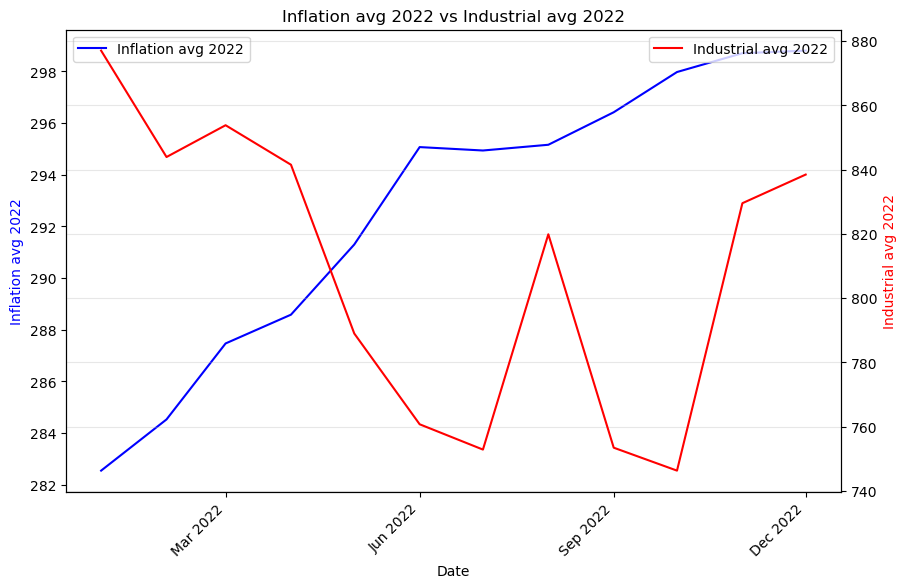

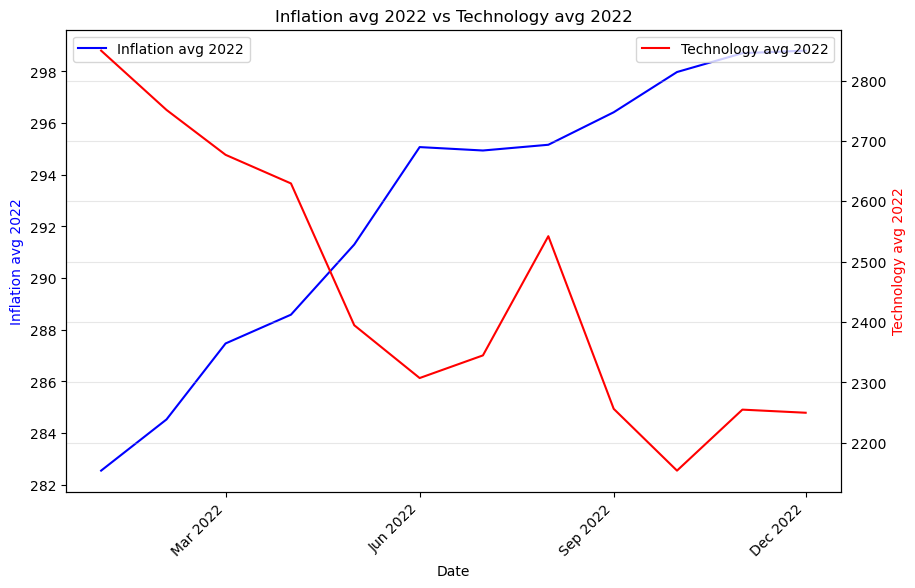

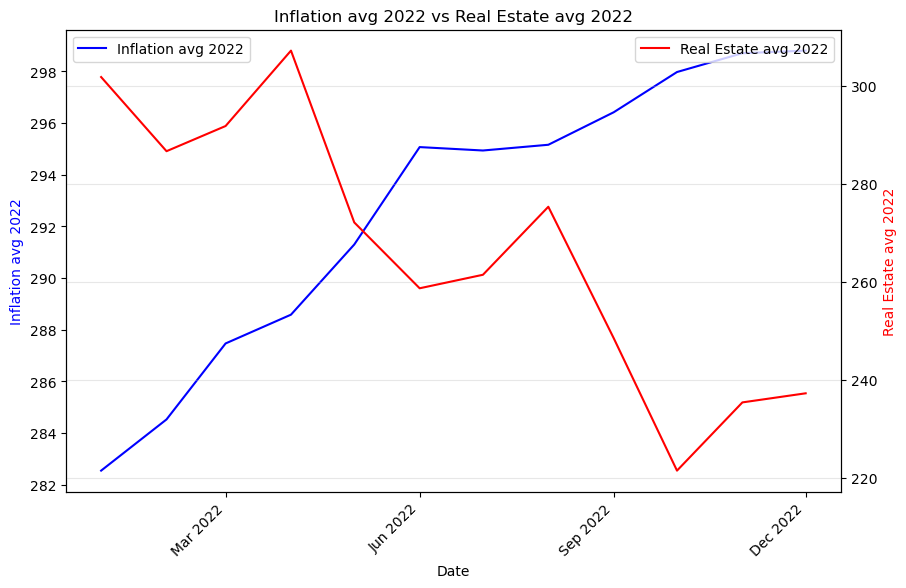

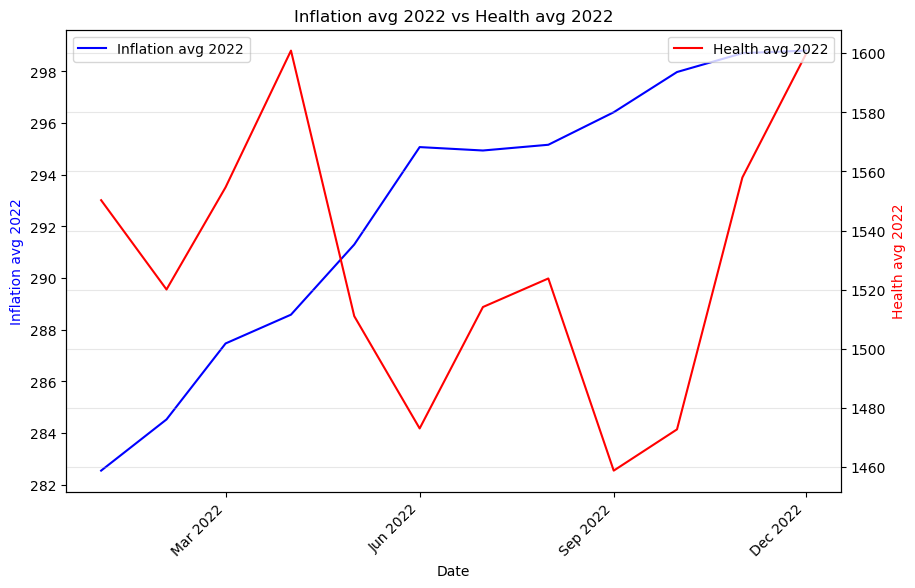

In [69]:
mcomp_graph_dual(inflate2022, "Inflation avg 2022", energyavg2022, "Energy avg 2022", show_change=False)
mcomp_graph_dual(inflate2022, "Inflation avg 2022", industavg2022, "Industrial avg 2022", show_change=False)
mcomp_graph_dual(inflate2022, "Inflation avg 2022", techavg2022, "Technology avg 2022", show_change=False)
mcomp_graph_dual(inflate2022, "Inflation avg 2022", houseavg2022, "Real Estate avg 2022", show_change=False)
mcomp_graph_dual(inflate2022, "Inflation avg 2022", healthavg2022, "Health avg 2022", show_change=False)

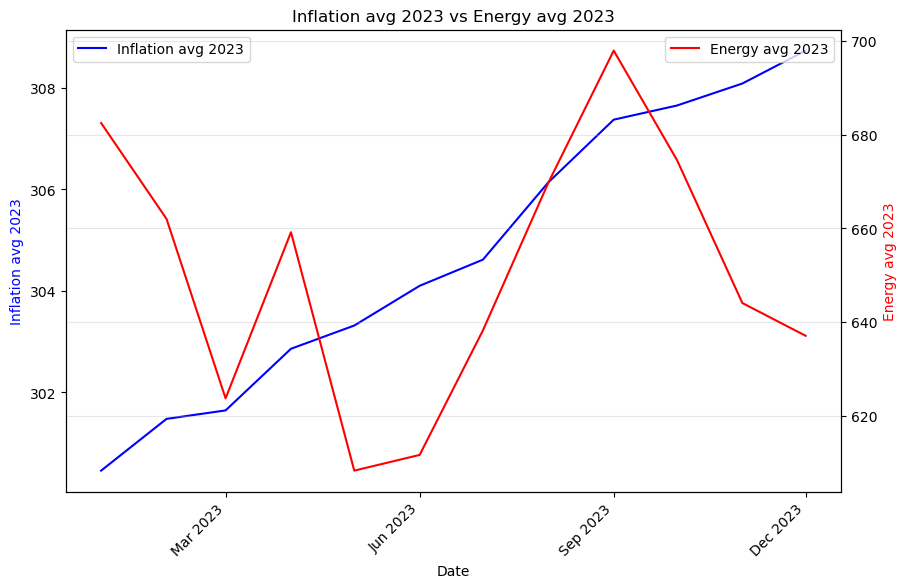

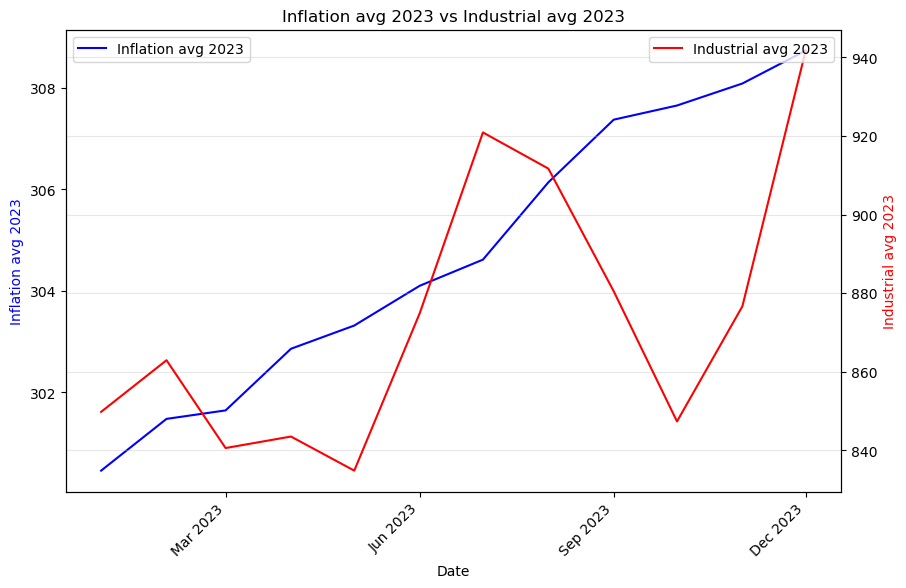

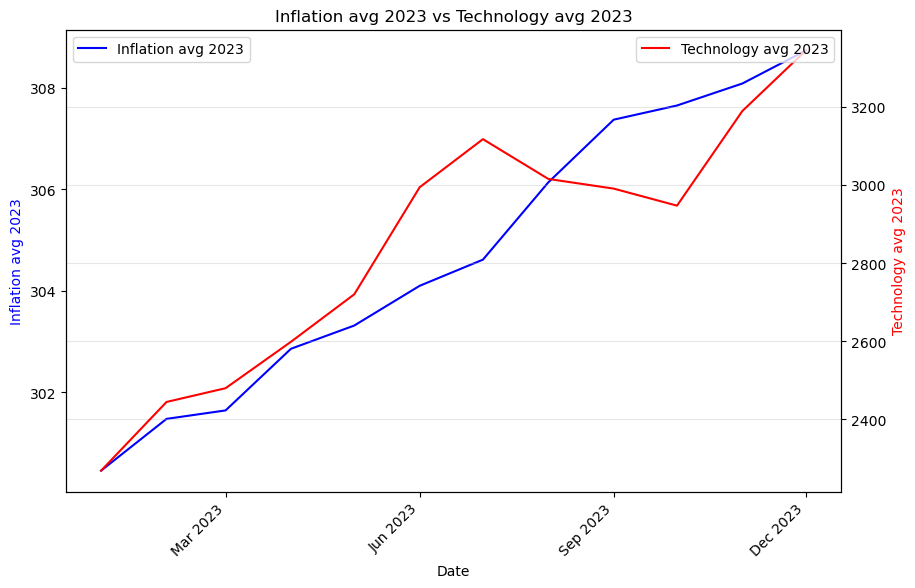

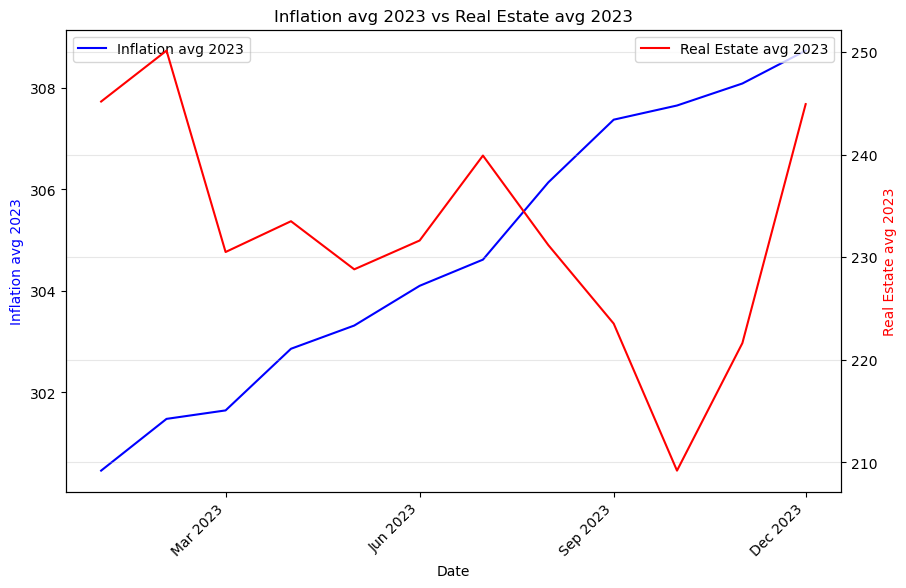

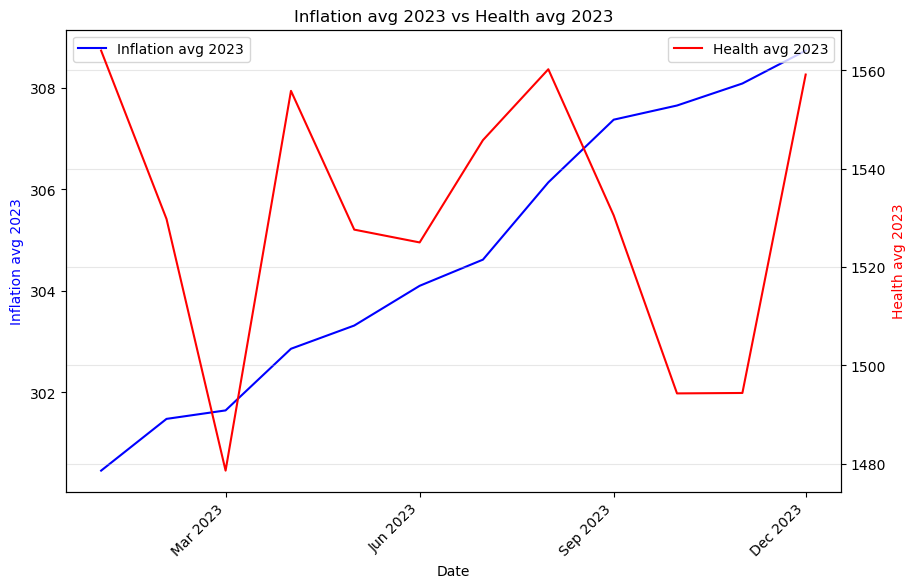

In [70]:
mcomp_graph_dual(inflate2023, "Inflation avg 2023", energyavg2023, "Energy avg 2023", show_change=False)
mcomp_graph_dual(inflate2023, "Inflation avg 2023", industavg2023, "Industrial avg 2023", show_change=False)
mcomp_graph_dual(inflate2023, "Inflation avg 2023", techavg2023, "Technology avg 2023", show_change=False)
mcomp_graph_dual(inflate2023, "Inflation avg 2023", houseavg2023, "Real Estate avg 2023", show_change=False)
mcomp_graph_dual(inflate2023, "Inflation avg 2023", healthavg2023, "Health avg 2023", show_change=False)

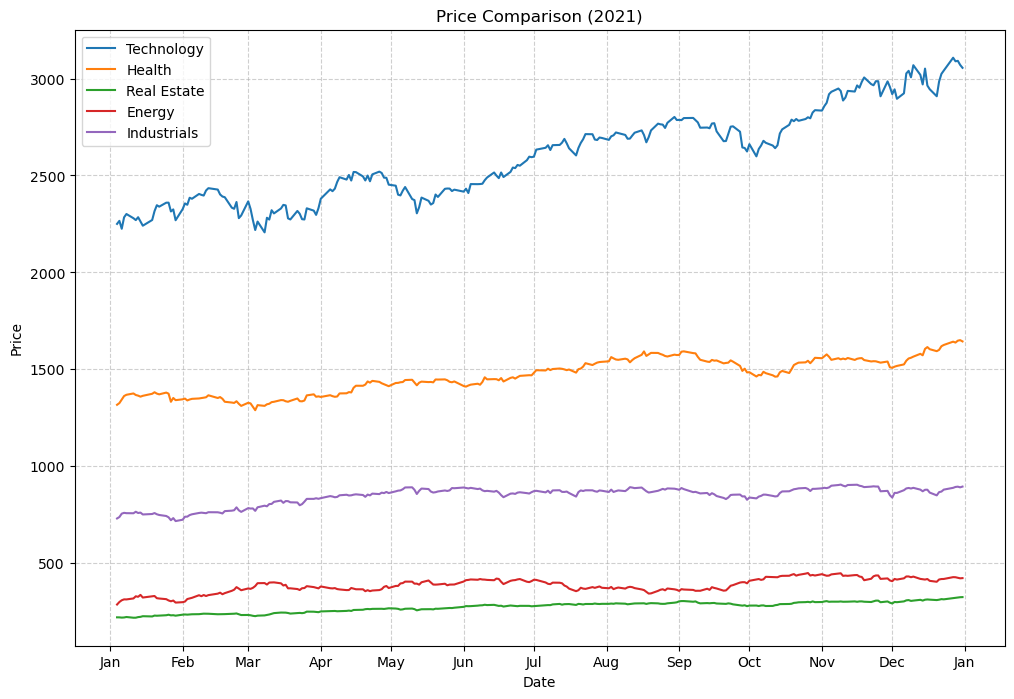

In [61]:
dfs2021 = [tech2021,health2021,house2021,energy2021,indust2021]
labels2021 = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']

# pretty_multi_graph(dfs2020, labels2020,"Price Comparison (2020)")
fig, ax = pretty_multi_graph(dfs2021, labels2021,"Price Comparison (2021)" )
fig.savefig('Inflation_Graphs/Prices2021.png')
plt.show()

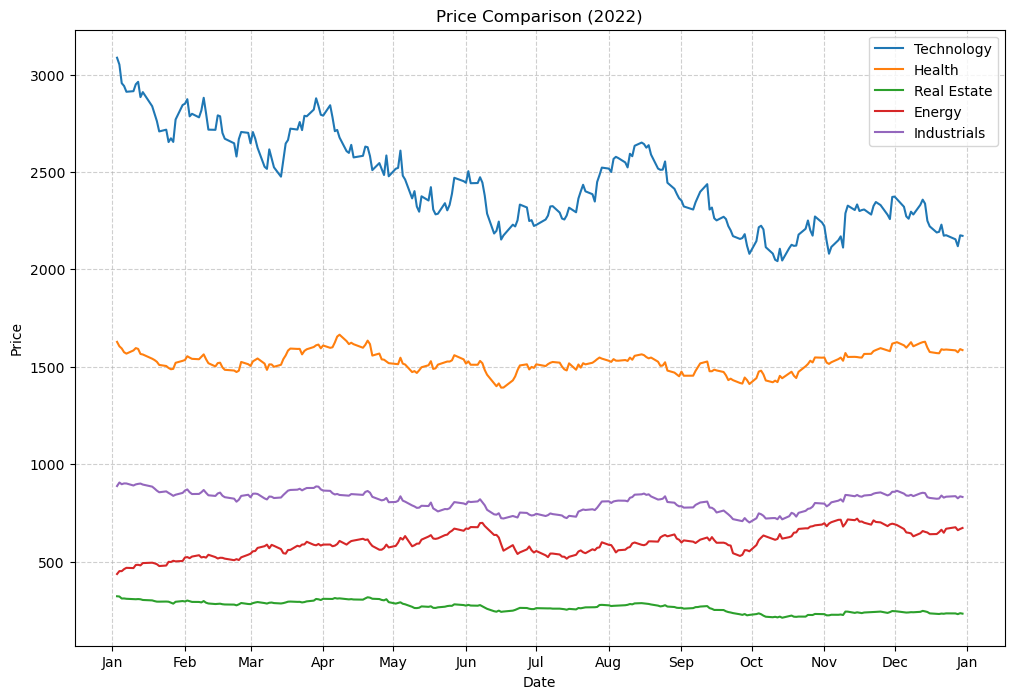

In [62]:
dfs2022 = [tech2022,health2022,house2022,energy2022,indust2022]
labels2022 = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']

# pretty_multi_graph(dfs2020, labels2020,"Price Comparison (2020)")
fig, ax = pretty_multi_graph(dfs2022, labels2022,"Price Comparison (2022)" )
fig.savefig('Inflation_Graphs/Prices2022.png')
plt.show()

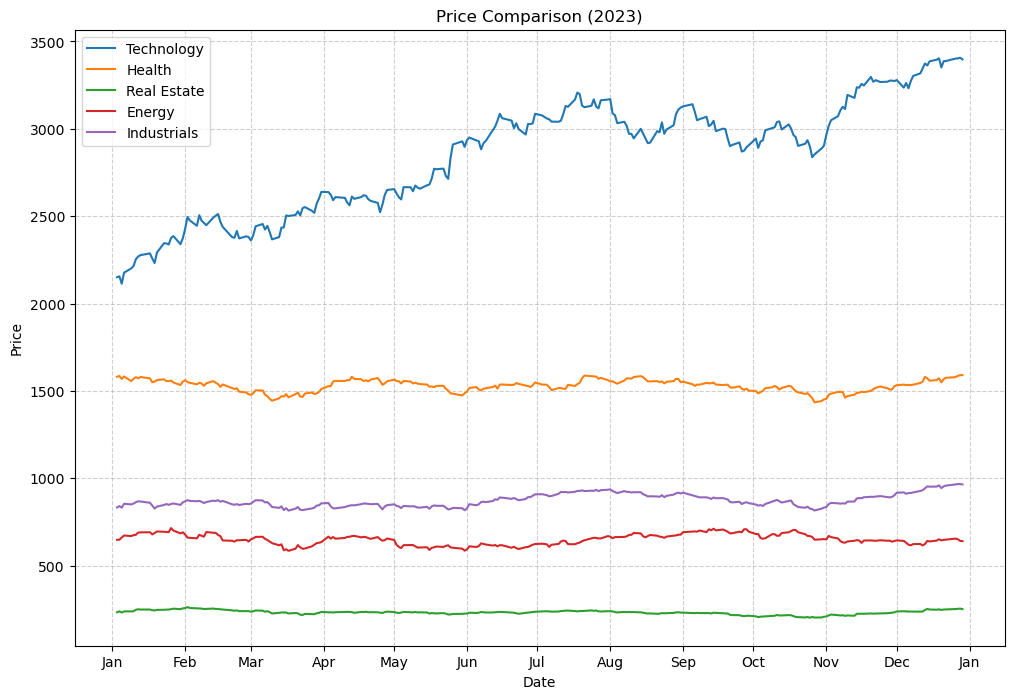

In [63]:
dfs2023 = [tech2023,health2023,house2023,energy2023,indust2023]
labels2023 = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']

# pretty_multi_graph(dfs2020, labels2020,"Price Comparison (2020)")
fig, ax = pretty_multi_graph(dfs2023, labels2023,"Price Comparison (2023)" )
fig.savefig('Inflation_Graphs/Prices2023.png')
plt.show()

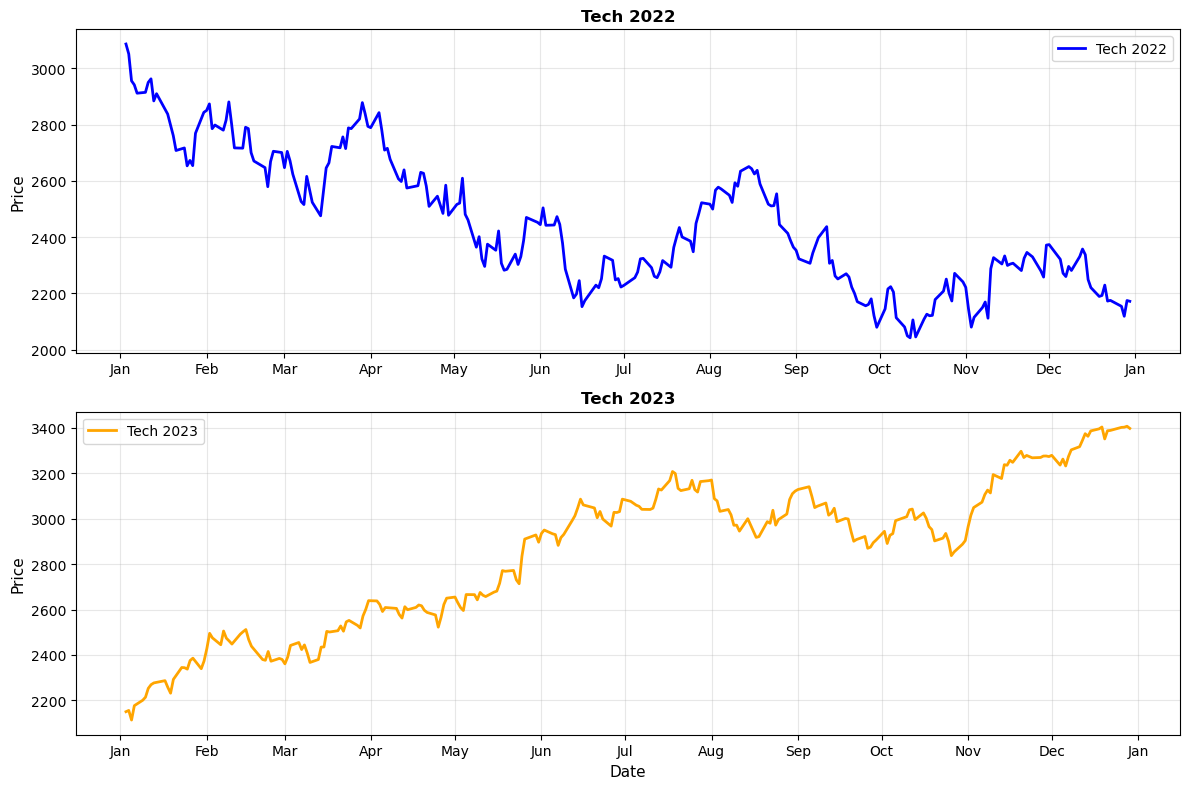

In [71]:
mcomp_graph_stacked(tech2022, "Tech 2022", tech2023, "Tech 2023")

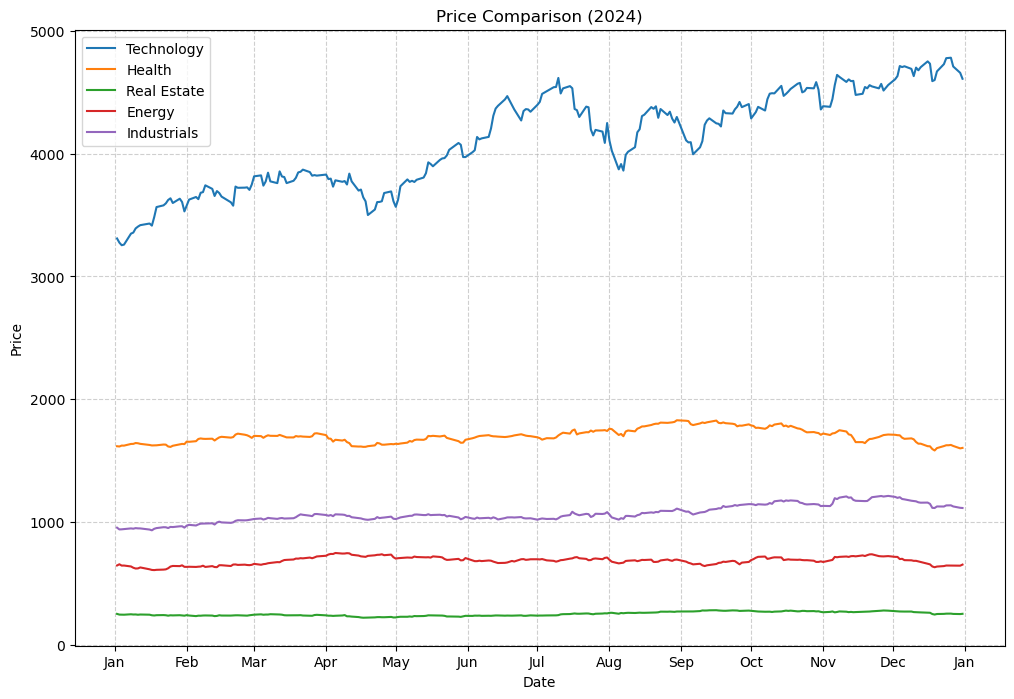

In [80]:
dfs2024 = [tech2024,health2024,house2024,energy2024,indust2024]
labels2024 = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']

# pretty_multi_graph(dfs2020, labels2020,"Price Comparison (2020)")
fig, ax = pretty_multi_graph(dfs2024, labels2024,"Price Comparison (2024)" )
fig.savefig('Inflation_Graphs/Prices2024.png')
plt.show()

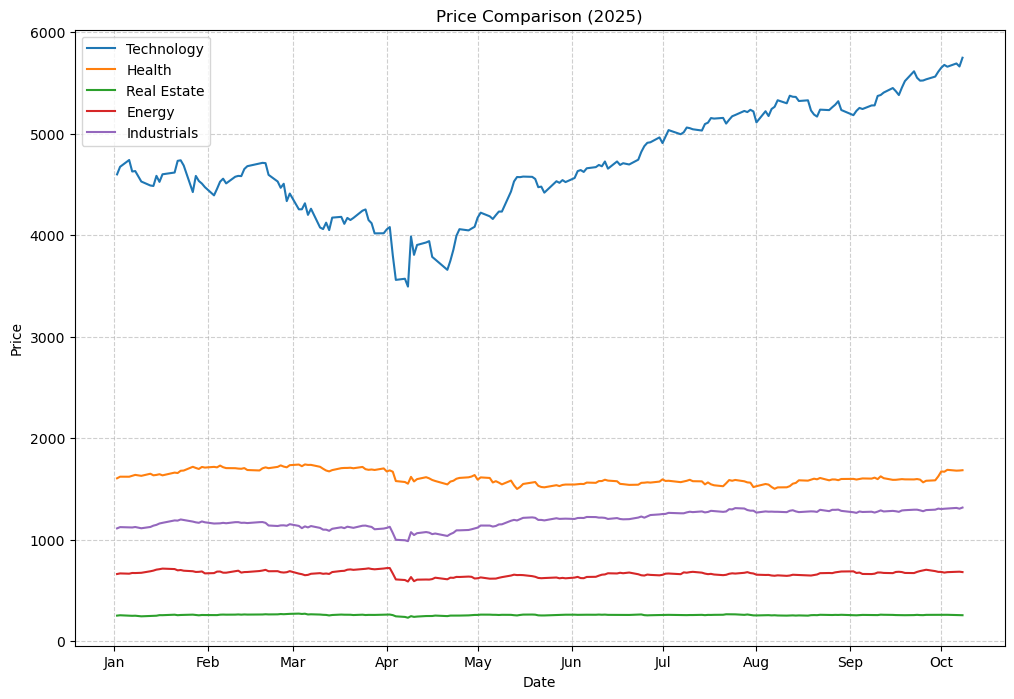

In [85]:
dfs2025 = [tech2025,health2025,house2025,energy2025,indust2025]
labels2025 = ['Technology', 'Health', 'Real Estate', 'Energy', 'Industrials']

# pretty_multi_graph(dfs2020, labels2020,"Price Comparison (2020)")
fig, ax = pretty_multi_graph(dfs2025, labels2025,"Price Comparison (2025)" )
fig.savefig('Inflation_Graphs/Prices2025.png')
plt.show()